# MCSD2123 – MASSIVE DATA MINING AND STREAMING
# GROUP ASSIGNMENT 2

INSTRUCTIONS:
1. Each group is required to identify ONE (1) case that relates to Supervised Machine
Learning with application on Textual Data. (Example: sentiment analysis, text
classification, etc) in any domain.
2. Then, identify suitable dataset(s) to be used for the chosen case (you may use more
than ONE (1) dataset if needed).
3. Study and perform EDA to understand the datasets.
4. Explore and select at least THREE (3) supervised machine learning algorithms for
training the models using the identified dataset(s). Make sure datasets are properly
prepared and processed.
5. You should evaluate and compare the performance of all models.
6. Conclude your findings. In your selected case and data, which model performs the
best? Provide your discussion.


# Group Member
1. Thong Yee Moon (MCS231001)
2. Lee Seow Ming Theresa (MCS231013)
3. Arjuna Sutan (MCS221004)

# Introduction

## Problem Background

Online reviews significantly influence consumer purchasing decisions, particularly in the food industry. Fine Food focuses on the key industry areas of bakery, confectionery, dairy, meat & seafood, and natural products.

Analyzing sentiments in these reviews helps businesses understand customer satisfaction, improve product offerings, and enhance customer experience.

\
\
High Review Volume: The Amazon Fine Food reviews dataset contains a large number of reviews, providing a robust sample for analysis.

Diverse Opinions: Reviews cover a wide range of products, reflecting diverse consumer opinions and sentiments.

Business Impact: Fine foods are a critical category where customer feedback directly impacts product development and marketing strategies.

Relevance: Sentiment analysis in the food sector helps identify trends, preferences, and areas needing improvement, directly benefiting producers and consumers.



## About Dataset

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review.

1. Reviews from Oct 1999 - Oct 2012
2. 568,454 reviews
3. 256,059 users
4. 74,258 products
5. 260 users with > 50 reviews

##  Objective

1. To conduct data and text preprocessing on Amazon Fine Food Review.
2. To conduct sentiment analysis on consumer’s review toward Amazon Fine Food.
3. To perform model development on predict and classify customer reviews into 3 categories (Positive, Negative and Neutral)
4. To evaluate model performance on sentiment classification and analysis.

## Flow of Executive

1. Data and Libarary Import
2. Data Preprocessing
  - Data Type Conversion
  - Data cleaning
3. Feature Engineering
  - Data binning
  - Timestamp extraction
4. Text Preprocessing
  - Letter Case Standardization
  - Punctuation Removal
  - Whitespace Removal
  - Digit Number Removal
  - Tokenization
  - Word Lemmatizing
  - Stopword Removal
  - Removal of Unicode / Bicode Characters
  - Rejoin
5. EDA
6. Label Encoding
7. Stratified Data Splitting
8. Word2vec word embedding and vectorization
9. Model Development
10. Model Evaluation

# Import Libraries

In [1]:
# Run this for dataset if in google drive

#from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# libraries for data wrangling and data manipulation
import pandas as pd
import numpy as np
import datetime
import re

# libraries for Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# libraries for Model Development and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from joblib import Parallel, delayed
from sklearn.utils import parallel_backend
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from joblib import parallel_backend
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Word Embedding
from gensim.models import Word2Vec
import gensim
import os
import time


# Warning
import warnings
#ignore warning
warnings.filterwarnings('ignore')

In Python, we can use the nltk library for doing basic text pre-proccessing.
To get start with, install the nltk library in Python using following command

In [3]:
!pip install nltk

Import the word_tokenize, stopword library, word lemmatization and word stemming function within nltk library.

In [4]:
# String library with built-in punctuation records
import string

# nltk library for text preprocessing purpose
import nltk
nltk.download('punkt')

# Library for work tokenize purpose
from nltk.tokenize import word_tokenize

# , we can download the predefined stopwords corpus and use that to remove any stop words from the tokens.
from nltk.corpus import stopwords
nltk.download('stopwords')

#To do lemmatization in Python, can use the WordNetLemmatizer from stem module in nltk library.
# This requires the download of the wordnet resources

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#For stemming, can use the PorterStemmer from stem module in nltk library.
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /Users/nasutan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nasutan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/nasutan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Word cloud is one of the most powerful and straightforward visualization methods when it comes to text data.
It is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance
Install and use the Python wordcloud library to create tag clouds.

In [5]:
! pip install wordcloud

In [6]:
from wordcloud import WordCloud

# Data Import

Import Dataset using pandas.read_csv function.
Load the data and store it in dataframe named as Review_df.

In [7]:
# Google Drive
# Change path to file if different
# Yvonne
#Review_df = pd.read_csv('/content/drive/MyDrive/Reviews.csv')
# Theresa
# Review_df = pd.read_csv('/content/drive/MyDrive/Data Mining/group assign/Reviews.csv')
#Sutan
# Review_df = pd.read_csv('/content/drive/MyDrive/Data Mining Group/Reviews.csv')


# Local Machine (Jupyter)
Review_df = pd.read_csv('Reviews.csv')

Review_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


# Data Preparation, Data Preprocessing

- Data Preview
- Data Type Classification
- Handling Missing Value
- Handling Duplicated Values
- (x) Handling Outliers
- (x) Data Standardization / Normalization

## Data Preview

In [8]:
# Viwe the first 5 rows of dataframe
Review_df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
# View the last 5 rows of the dataframe.
Review_df.tail(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [10]:
# Check Name of features
Review_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [11]:
Review_df.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218416
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

In [12]:
# Check the size of dataframe
Review_df.shape

(568454, 10)

1. The dataframe contained 10 features including
> ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator','HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']
2. There are 568454 reviews in the dataframe which up to 500k of reviews had been collected and ready to perform sentiment analysis

In [13]:
# Description of Numerical Data

Review_df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


The values in column 'Id' are not unique which is similar to the index. Hence column 'Id' can be dropped







In [14]:
# Drop 'Id' columns due to duplicated with index number
Review_df.drop('Id',axis=1,inplace=True)

Review_df.columns

Index(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## Data Type

In [15]:
# Check on Data Type
Review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568438 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int64 
 4   HelpfulnessDenominator  568454 non-null  int64 
 5   Score                   568454 non-null  int64 
 6   Time                    568454 non-null  int64 
 7   Summary                 568427 non-null  object
 8   Text                    568454 non-null  object
dtypes: int64(4), object(5)
memory usage: 39.0+ MB


All the data type had been categorized correctly except 'Time' which supposed to convert to datetime format.

In [16]:
# Convert 'Time' from integer to datetime format
Review_df['Time'] = pd.to_datetime(Review_df['Time'],unit='s')

# View the first 5 rows after data type conversion
Review_df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


In [17]:
# Reverify the Data Type after conversion

Review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ProductId               568454 non-null  object        
 1   UserId                  568454 non-null  object        
 2   ProfileName             568438 non-null  object        
 3   HelpfulnessNumerator    568454 non-null  int64         
 4   HelpfulnessDenominator  568454 non-null  int64         
 5   Score                   568454 non-null  int64         
 6   Time                    568454 non-null  datetime64[ns]
 7   Summary                 568427 non-null  object        
 8   Text                    568454 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 39.0+ MB


Shrink numerical columns with smaller dtypes to reduce memory and processing time.

1. Integer

  - int8 can store integers from -128 to 127.
  - int16 can store integers from -32768 to 32767.
  - int 32 can store integers from -2,147,483,648 to +2,147,483,647
  - int64 can store integers from -9223372036854775808 to 9223372036854775807.

In [18]:
# Optimize Data type

# Maximum of  [HelpfulnessNumerator] is 866 --> hence int16 selected within the range of data storage
Review_df['HelpfulnessNumerator'] = Review_df['HelpfulnessNumerator'].astype(np.int16)

# Maximum of  [HelpfulnessDenominator] is 9236 --> hence int16 selected within the range of data storage
Review_df['HelpfulnessDenominator'] = Review_df['HelpfulnessDenominator'].astype(np.int16)

# Maximum of [Score] is 5 ---> hence int8 selected within the range of data storage
Review_df['Score'] = Review_df['Score'].astype(np.int8)

# Change object type to category
# Review_df['ProductId'] = Review_df['ProductId'].astype('category')
# Review_df['UserId'] = Review_df['UserId'].astype('category')
# Review_df['ProfileName'] = Review_df['ProfileName'].astype('category')
# Review_df['Summary'] = Review_df['Summary'].astype('category')
# Review_df['Text'] = Review_df['Text'].astype('category')

In [19]:
Review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ProductId               568454 non-null  object        
 1   UserId                  568454 non-null  object        
 2   ProfileName             568438 non-null  object        
 3   HelpfulnessNumerator    568454 non-null  int16         
 4   HelpfulnessDenominator  568454 non-null  int16         
 5   Score                   568454 non-null  int8          
 6   Time                    568454 non-null  datetime64[ns]
 7   Summary                 568427 non-null  object        
 8   Text                    568454 non-null  object        
dtypes: datetime64[ns](1), int16(2), int8(1), object(5)
memory usage: 28.7+ MB


Memory reduced from 39.0+ MB to 28.7+ MB

In [20]:
Categorical_cols = Review_df.select_dtypes(include=['object','category']).columns
Numerical_cols =Review_df.select_dtypes(include=['int16', 'int8']).columns


print(len(Categorical_cols), 'Categorical Data :\n',Categorical_cols)
print ()
print(len(Numerical_cols),'Numerical Data :\n', Numerical_cols)

5 Categorical Data :
 Index(['ProductId', 'UserId', 'ProfileName', 'Summary', 'Text'], dtype='object')

3 Numerical Data :
 Index(['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score'], dtype='object')


There are 5 Categorical Values and 3 Numerical Data

## Handling Missing Values

In [21]:
# Check on any missing values in the dataframe
Review_df.isnull().sum()

ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

From the dataset, it found 26 missing values in 'ProfileName' and 27 missing value in 'Summary'

In [22]:
print('Percentage of missing value:')
print('-----------------')
for col in Review_df.columns:
  if Review_df[col].isnull().sum() != 0:
    print(col ,'=', round((((Review_df[col].isnull().sum())/Review_df.shape[0])*100),4),'%')

Percentage of missing value:
-----------------
ProfileName = 0.0028 %
Summary = 0.0047 %


The missing values only affecting 0.0047% of the dataframe.

Hence due to the unsignificant impact, **deletion** method can be used in this case.

In [23]:
Before_removal = Review_df.shape[0]

# Drop missing values
Review_df.dropna(inplace=True)

After_removal = Review_df.shape[0]

print('Total Row removed due to missing values: ', Before_removal-After_removal)

Total Row removed due to missing values:  43


In [24]:
# Reverify if there is still any missing value
Review_df.isnull().sum()

ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

## Handling Duplicated Values

In [25]:
# Check any duplicated entry on review
Review_df.duplicated().sum()

281

In [26]:
# Verify the duplicated review
Review_df[Review_df.duplicated(keep=False)].sort_values(by=['UserId','ProductId'])

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
493084,B003TC7WN4,A10H24TDLK2VDP,William Jens Jensen,0,0,3,2011-07-05,Unremarkable,"First, let me say that I prefer extra-bold K-C..."
493085,B003TC7WN4,A10H24TDLK2VDP,William Jens Jensen,0,0,3,2011-07-05,Unremarkable,"First, let me say that I prefer extra-bold K-C..."
8522,B003VXFK44,A10H24TDLK2VDP,William Jens Jensen,0,0,3,2011-07-05,Unremarkable,"First, let me say that I prefer extra-bold K-C..."
8523,B003VXFK44,A10H24TDLK2VDP,William Jens Jensen,0,0,3,2011-07-05,Unremarkable,"First, let me say that I prefer extra-bold K-C..."
535931,B003VXHGDM,A10H24TDLK2VDP,William Jens Jensen,0,0,3,2011-07-05,Unremarkable,"First, let me say that I prefer extra-bold K-C..."
...,...,...,...,...,...,...,...,...,...
174945,B002AN8OOO,AYQ8RLE0K6RU8,"M. Brown ""TankerToys.com""",0,0,4,2007-08-24,3 out of 4 Paws,"First Impression: The friendly folks over at ""..."
174946,B002AN8OOO,AYQ8RLE0K6RU8,"M. Brown ""TankerToys.com""",0,0,4,2007-08-24,3 out of 4 Paws,"First Impression: The friendly folks over at ""..."
174947,B002AN8OOO,AYQ8RLE0K6RU8,"M. Brown ""TankerToys.com""",0,0,4,2007-08-24,3 out of 4 Paws,"First Impression: The friendly folks over at ""..."
102764,B0061PPLYI,AYQ8RLE0K6RU8,"M. Brown ""TankerToys.com""",0,1,4,2007-08-24,3.5 out of 4 Paws,First Impression: Man it was time for a new Ny...


Throught the duplicated data observation, for example:

- index 493084 and 493085 showed the 100% similary
- index 8522 and 8523 also showed the 100% similary

As a result, it can be surely confirmed that the duplicated values were captured correctly.

In [27]:
## Remove duplicated review

Review_df.drop_duplicates(inplace=True)
Review_df.duplicated().sum()

0

In [28]:
# Check the shape of dataframe after removed
Review_df.shape

(568130, 9)

In [29]:
# reset index after dropping missing values and duplicated values.

Review_df.reset_index(drop=True,inplace=True)

## (X) Handling Outliers / Data Normalization (Excluded from data preprocessing)

In [30]:
Numerical_cols

Index(['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score'], dtype='object')

In [31]:
Review_df.nunique()

ProductId                  74258
UserId                    256047
ProfileName               218413
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295736
Text                      393565
dtype: int64

From the dataset, the numerical values are discrete data which ono outlier will need to handle and it is not eligible for data normalization.

# Feature Engineering
- Score Grouping / Data Binning
- Extraction of Timestamp (Year, Month, Day,Weekday)

## Data Binning on Score of review

Since the objective in this project is to classify and predict whether a review is positive,negative or neutral. Hence, a new feature can be created to categorize the score into different group for sentiment analysis.

Based on the Score column, it has values 1,2,3,4,5.

- By Considering 1, 2 as Negative reviews and 4, 5 as Positive reviews. For Score = 3, it will be consider as Neutral review.



In [32]:
# Data Binning on Rating


Score_group ={1:'Negative',2:'Negative',3:'Neutral',4:'Positive',5:'Positive'}

Review_df['Sentiment'] = Review_df['Score'].map(Score_group)
Review_df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Positive
...,...,...,...,...,...,...,...,...,...,...
568125,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Positive
568126,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Negative
568127,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Positive
568128,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Positive


## Extraction of Timestamp value

The timestamp values can be further extract in term of year, month, day, weekday for analysis the behaviour of customer when doing review.

In [33]:
# Year of the Review
Review_df['Year'] = Review_df['Time'].dt.year

# Month of the review
Review_df['Month'] = Review_df['Time'].dt.month

# Day of the review
Review_df['Day'] = Review_df['Time'].dt.day

# Month of the review
Review_df['Weekday'] = Review_df['Time'].dt.weekday

In [34]:
Review_df['Weekday'].unique()

array([2, 4, 0, 6, 3, 1, 5])

In [35]:
weekday_map ={0:'Mon',
              1:'Tue',
              2:'Wed',
              3:'Thu',
              4:'Fri',
              5:'Sat',
              6:'Sun'}

# For references purpose. It can be dropped during model development
Review_df['Weekday_Label'] = Review_df['Weekday'].map(weekday_map)


In [36]:
Review_df.head(5)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Year,Month,Day,Weekday,Weekday_Label
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,2011,4,27,2,Wed
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,2012,9,7,4,Fri
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,2008,8,18,0,Mon
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Negative,2011,6,13,0,Mon
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Positive,2012,10,21,6,Sun


# Text Preprocessing
- Letter Case Standardization _Lowering
- Whitespace Removal
- Punctuation Removal
- Digit Number Removal
- Tokenization
- Word Stemming / Lemmatizing
- Stop words removal
- Removal of Unicode Characters
- Join Tokenized Text


In this section, only 'Text' Column will be processed and 'Summary' will not process to maintain its' uniquity.

## Letter Case Standardization_Lowering
The lower case and upper case are treated differently by the machine. Hence it is important to make sure the text in the same case and the most preferred case is a lower case.

In [37]:
# Letter Case Standardization for text

Review_df['Text'] = Review_df['Text'].str.lower()

Review_df['Text']

0         i have bought several of the vitality canned d...
1         product arrived labeled as jumbo salted peanut...
2         this is a confection that has been around a fe...
3         if you are looking for the secret ingredient i...
4         great taffy at a great price.  there was a wid...
                                ...                        
568125    great for sesame chicken..this is a good if no...
568126    i'm disappointed with the flavor. the chocolat...
568127    these stars are small, so you can give 10-15 o...
568128    these are the best treats for training and rew...
568129    i am very satisfied ,product is as advertised,...
Name: Text, Length: 568130, dtype: object

In [38]:
Review_df['Summary'] = Review_df['Summary'].str.lower()

Review_df['Summary']

0                      good quality dog food
1                          not as advertised
2                      "delight" says it all
3                             cough medicine
4                                great taffy
                         ...                
568125                   will not do without
568126                          disappointed
568127              perfect for our maltipoo
568128    favorite training and reward treat
568129                           great honey
Name: Summary, Length: 568130, dtype: object

## Punctuation Removal

There are total 32 main punctuations.
We can directly use the string module with a regular expression to replace any punctuation in text with an empty string.

In [39]:
# Punctuation Removal

Review_df['Text'] = Review_df['Text'].str.replace('[{}]'.format(string.punctuation),' ', regex=True)
Review_df['Text']

0         i have bought several of the vitality canned d...
1         product arrived labeled as jumbo salted peanut...
2         this is a confection that has been around a fe...
3         if you are looking for the secret ingredient i...
4         great taffy at a great price   there was a wid...
                                ...                        
568125    great for sesame chicken  this is a good if no...
568126    i m disappointed with the flavor  the chocolat...
568127    these stars are small  so you can give 10 15 o...
568128    these are the best treats for training and rew...
568129    i am very satisfied  product is as advertised ...
Name: Text, Length: 568130, dtype: object

In [40]:
Review_df['Summary'] = Review_df['Summary'].str.replace('[{}]'.format(string.punctuation),' ', regex=True)
Review_df['Summary']

0                      good quality dog food
1                          not as advertised
2                       delight  says it all
3                             cough medicine
4                                great taffy
                         ...                
568125                   will not do without
568126                          disappointed
568127              perfect for our maltipoo
568128    favorite training and reward treat
568129                           great honey
Name: Summary, Length: 568130, dtype: object

## Whitespace Removal

In [41]:
Review_df['Text'] = Review_df['Text'].str.strip()
Review_df['Text']

0         i have bought several of the vitality canned d...
1         product arrived labeled as jumbo salted peanut...
2         this is a confection that has been around a fe...
3         if you are looking for the secret ingredient i...
4         great taffy at a great price   there was a wid...
                                ...                        
568125    great for sesame chicken  this is a good if no...
568126    i m disappointed with the flavor  the chocolat...
568127    these stars are small  so you can give 10 15 o...
568128    these are the best treats for training and rew...
568129    i am very satisfied  product is as advertised ...
Name: Text, Length: 568130, dtype: object

In [42]:
Review_df['Summary'] = Review_df['Summary'].str.strip()
Review_df['Summary']

0                      good quality dog food
1                          not as advertised
2                       delight  says it all
3                             cough medicine
4                                great taffy
                         ...                
568125                   will not do without
568126                          disappointed
568127              perfect for our maltipoo
568128    favorite training and reward treat
568129                           great honey
Name: Summary, Length: 568130, dtype: object

## Digit Number Removal

Sometimes it happens that words and digits combine are written in the text which creates a problem for machines to understand. Hence, We need to remove the digits which are combined.

Examples:

- '10' & '15' found in row 568451

In [43]:
## Digit Number Removal

Review_df['Text'] = Review_df['Text'].str.replace('[\d+]', '',regex=True)
Review_df['Text']

0         i have bought several of the vitality canned d...
1         product arrived labeled as jumbo salted peanut...
2         this is a confection that has been around a fe...
3         if you are looking for the secret ingredient i...
4         great taffy at a great price   there was a wid...
                                ...                        
568125    great for sesame chicken  this is a good if no...
568126    i m disappointed with the flavor  the chocolat...
568127    these stars are small  so you can give   of th...
568128    these are the best treats for training and rew...
568129    i am very satisfied  product is as advertised ...
Name: Text, Length: 568130, dtype: object

In [44]:
Review_df['Summary'] = Review_df['Summary'].str.replace('[\d+]', '',regex=True)
Review_df['Summary']

0                      good quality dog food
1                          not as advertised
2                       delight  says it all
3                             cough medicine
4                                great taffy
                         ...                
568125                   will not do without
568126                          disappointed
568127              perfect for our maltipoo
568128    favorite training and reward treat
568129                           great honey
Name: Summary, Length: 568130, dtype: object

## Tokenization

Tokenization is the process of breaking up text into separate tokens, which can be individual words, phrases, or whole sentences. In this step, after preprocessing the text by removing all the noise and standardization, the text is then can split into smaller units as transaction list.

In [45]:
def tokenization(inputs):
    return word_tokenize(inputs)

Review_df['Text'] = Review_df['Text'].apply(tokenization)
Review_df['Text']

0         [i, have, bought, several, of, the, vitality, ...
1         [product, arrived, labeled, as, jumbo, salted,...
2         [this, is, a, confection, that, has, been, aro...
3         [if, you, are, looking, for, the, secret, ingr...
4         [great, taffy, at, a, great, price, there, was...
                                ...                        
568125    [great, for, sesame, chicken, this, is, a, goo...
568126    [i, m, disappointed, with, the, flavor, the, c...
568127    [these, stars, are, small, so, you, can, give,...
568128    [these, are, the, best, treats, for, training,...
568129    [i, am, very, satisfied, product, is, as, adve...
Name: Text, Length: 568130, dtype: object

In [46]:
Review_df['Summary'] = Review_df['Summary'].apply(tokenization)
Review_df['Summary']

0                       [good, quality, dog, food]
1                            [not, as, advertised]
2                         [delight, says, it, all]
3                                [cough, medicine]
4                                   [great, taffy]
                            ...                   
568125                    [will, not, do, without]
568126                              [disappointed]
568127               [perfect, for, our, maltipoo]
568128    [favorite, training, and, reward, treat]
568129                              [great, honey]
Name: Summary, Length: 568130, dtype: object

## Word Lemmatizing

Lemmatization is a text processing technique used in natural language processing (NLP) to normalize words into their base or dictionary form, also known as a lemma. It goes a step further than stemming, which simply removes suffixes to create a base word.

In [47]:
# Lemmetization

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

Review_df['Text'] = Review_df['Text'].apply(lemmatize_text)
Review_df['Text']

0         [i, have, bought, several, of, the, vitality, ...
1         [product, arrived, labeled, a, jumbo, salted, ...
2         [this, is, a, confection, that, ha, been, arou...
3         [if, you, are, looking, for, the, secret, ingr...
4         [great, taffy, at, a, great, price, there, wa,...
                                ...                        
568125    [great, for, sesame, chicken, this, is, a, goo...
568126    [i, m, disappointed, with, the, flavor, the, c...
568127    [these, star, are, small, so, you, can, give, ...
568128    [these, are, the, best, treat, for, training, ...
568129    [i, am, very, satisfied, product, is, a, adver...
Name: Text, Length: 568130, dtype: object

In [48]:
Review_df['Summary'] = Review_df['Summary'].apply(lemmatize_text)
Review_df['Summary']

0                       [good, quality, dog, food]
1                             [not, a, advertised]
2                          [delight, say, it, all]
3                                [cough, medicine]
4                                   [great, taffy]
                            ...                   
568125                    [will, not, do, without]
568126                              [disappointed]
568127               [perfect, for, our, maltipoo]
568128    [favorite, training, and, reward, treat]
568129                              [great, honey]
Name: Summary, Length: 568130, dtype: object

## Stopword Removal

Stopwords are the most commonly occurring words in a text which do not provide any valuable information. stopwords like they, there, this, where, etc are some of the stopwords.

In [49]:
## Stopwords Removal

stop_words = set (stopwords.words('english'))

def stopwords_remove(text):
    return [word for word in text if word not in stop_words]

Review_df['Text'] = Review_df['Text'].apply(stopwords_remove)
Review_df['Text']

0         [bought, several, vitality, canned, dog, food,...
1         [product, arrived, labeled, jumbo, salted, pea...
2         [confection, ha, around, century, light, pillo...
3         [looking, secret, ingredient, robitussin, beli...
4         [great, taffy, great, price, wa, wide, assortm...
                                ...                        
568125    [great, sesame, chicken, good, better, restura...
568126    [disappointed, flavor, chocolate, note, especi...
568127    [star, small, give, one, training, session, tr...
568128    [best, treat, training, rewarding, dog, good, ...
568129    [satisfied, product, advertised, use, cereal, ...
Name: Text, Length: 568130, dtype: object

In [50]:
Review_df['Summary'] = Review_df['Summary'].apply(stopwords_remove)
Review_df['Summary']

0                  [good, quality, dog, food]
1                                [advertised]
2                              [delight, say]
3                           [cough, medicine]
4                              [great, taffy]
                         ...                 
568125                              [without]
568126                         [disappointed]
568127                    [perfect, maltipoo]
568128    [favorite, training, reward, treat]
568129                         [great, honey]
Name: Summary, Length: 568130, dtype: object

## Removal of Unicode/Bicode Characters


There are some words in unicode/bicode which are meaningless and can be removed.

For example,
- 'ha' in index 2 of 'Text'
- 'wa' in index 4 of 'Text'
- 'im' in index 568450 of 'Text'

In [51]:
# Removing Words less than length 2

def remove_less_than_2(inputs):
    return [j for j in inputs if len(j) > 2]


Review_df['Text'] = Review_df['Text'].apply(remove_less_than_2)
Review_df['Text']

0         [bought, several, vitality, canned, dog, food,...
1         [product, arrived, labeled, jumbo, salted, pea...
2         [confection, around, century, light, pillowy, ...
3         [looking, secret, ingredient, robitussin, beli...
4         [great, taffy, great, price, wide, assortment,...
                                ...                        
568125    [great, sesame, chicken, good, better, restura...
568126    [disappointed, flavor, chocolate, note, especi...
568127    [star, small, give, one, training, session, tr...
568128    [best, treat, training, rewarding, dog, good, ...
568129    [satisfied, product, advertised, use, cereal, ...
Name: Text, Length: 568130, dtype: object

In [52]:
Review_df['Summary'] = Review_df['Summary'].apply(remove_less_than_2)
Review_df['Summary']

0                  [good, quality, dog, food]
1                                [advertised]
2                              [delight, say]
3                           [cough, medicine]
4                              [great, taffy]
                         ...                 
568125                              [without]
568126                         [disappointed]
568127                    [perfect, maltipoo]
568128    [favorite, training, reward, treat]
568129                         [great, honey]
Name: Summary, Length: 568130, dtype: object

## Re-Join Tokenized Text into Sentences

In [53]:
# rejoin tokenized words in new col for EDA
Review_df['Final_Text'] = Review_df['Text'].apply(lambda x :' '.join(x))
Review_df['Final_Text']

0         bought several vitality canned dog food produc...
1         product arrived labeled jumbo salted peanut pe...
2         confection around century light pillowy citrus...
3         looking secret ingredient robitussin believe f...
4         great taffy great price wide assortment yummy ...
                                ...                        
568125    great sesame chicken good better resturants ea...
568126    disappointed flavor chocolate note especially ...
568127    star small give one training session tried tra...
568128    best treat training rewarding dog good groomin...
568129    satisfied product advertised use cereal raw vi...
Name: Final_Text, Length: 568130, dtype: object

In [54]:
# Rejoin tokenized words in new col for EDA
Review_df['Final_Summary'] = Review_df['Summary'].apply(lambda x :' '.join(x))
Review_df['Final_Summary']

0                  good quality dog food
1                             advertised
2                            delight say
3                         cough medicine
4                            great taffy
                       ...              
568125                           without
568126                      disappointed
568127                  perfect maltipoo
568128    favorite training reward treat
568129                       great honey
Name: Final_Summary, Length: 568130, dtype: object

# EDA

In [55]:
Review_df.head(2)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Year,Month,Day,Weekday,Weekday_Label,Final_Text,Final_Summary
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,"[good, quality, dog, food]","[bought, several, vitality, canned, dog, food,...",Positive,2011,4,27,2,Wed,bought several vitality canned dog food produc...,good quality dog food
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,[advertised],"[product, arrived, labeled, jumbo, salted, pea...",Negative,2012,9,7,4,Fri,product arrived labeled jumbo salted peanut pe...,advertised


## Length Distribution

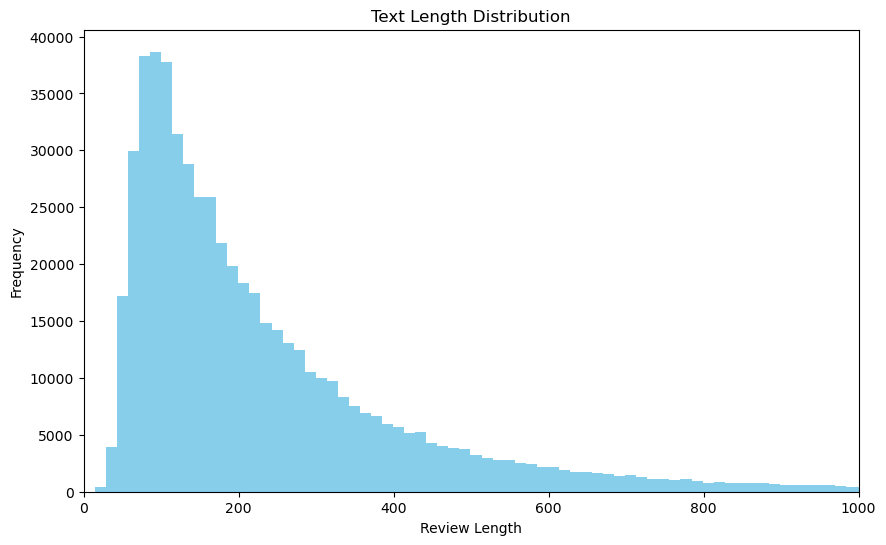

In [56]:
Review_df['Text_length'] = Review_df['Final_Text'].apply(lambda x: len(x))

plt.figure(figsize=(10, 6))
plt.hist(Review_df['Text_length'], bins=1000, color='skyblue')
plt.xlim(0, 1000)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.show()

## Score Distribution

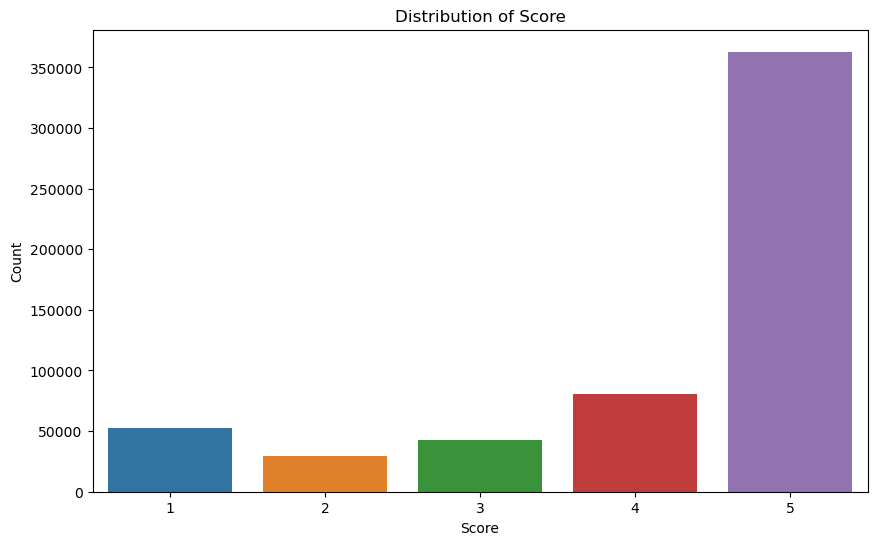

In [57]:
# Plotting of Score Distribution

fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(data=Review_df,x='Score',ax=ax)

plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

## Sentiment Distribution

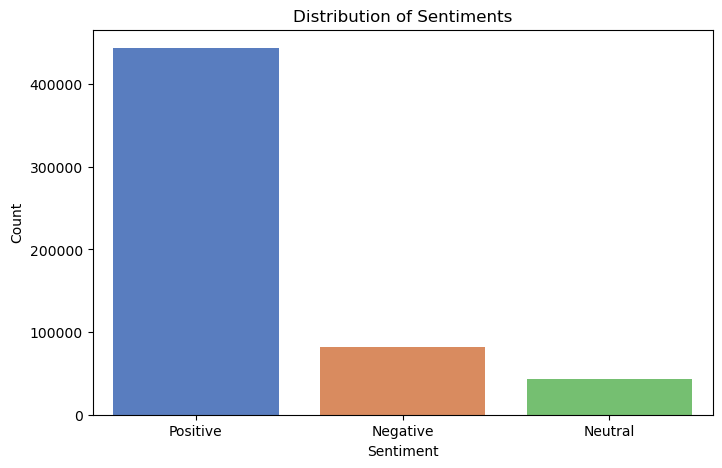

In [58]:
# Plotting Sentiment distribution

plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=Review_df, palette='muted')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Timestamp

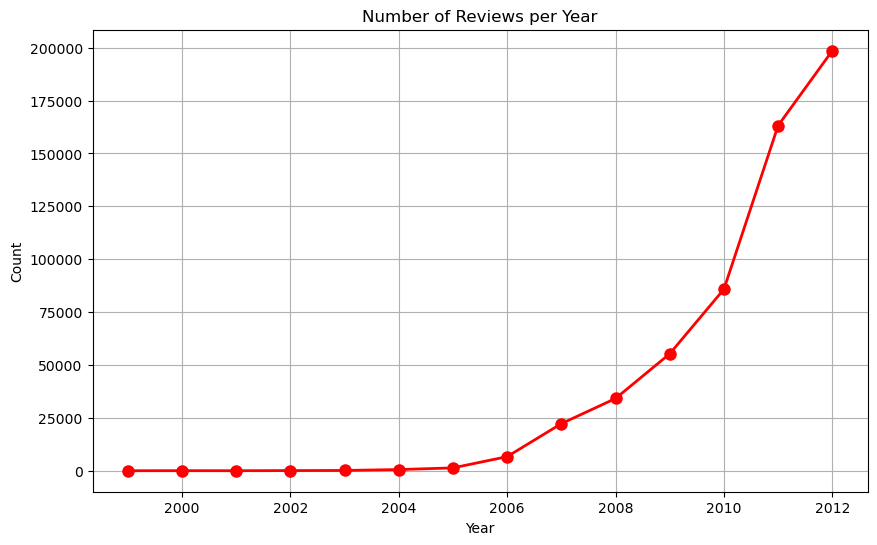

In [59]:
# Plotting the number of reviews per year

plt.figure(figsize=(10, 6))
Review_df.groupby('Year').size().plot(marker='o', color='r', linewidth=2, markersize=8)
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

The graph shows a significant increase in the number of reviews over time, especially from 2008 onwards. This could suggest increasing interest and trust in online purchases.

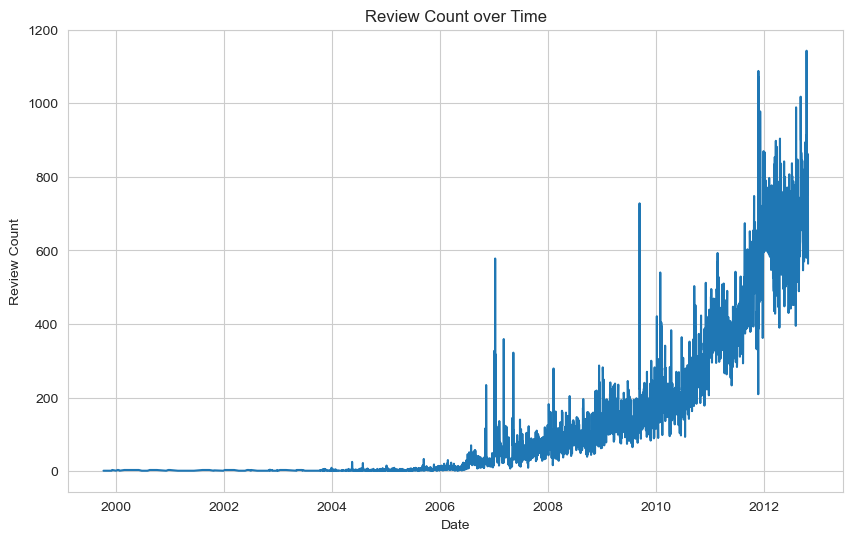

In [60]:
Review_df['Time'] = pd.to_datetime(Review_df['Time'])

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
Review_df['Time'].dt.date.value_counts().sort_index().plot()
plt.title('Review Count over Time')
plt.xlabel('Date')
plt.ylabel('Review Count')
plt.show()

This graph indicates a growing number of reviews density, suggesting an increase in activity.

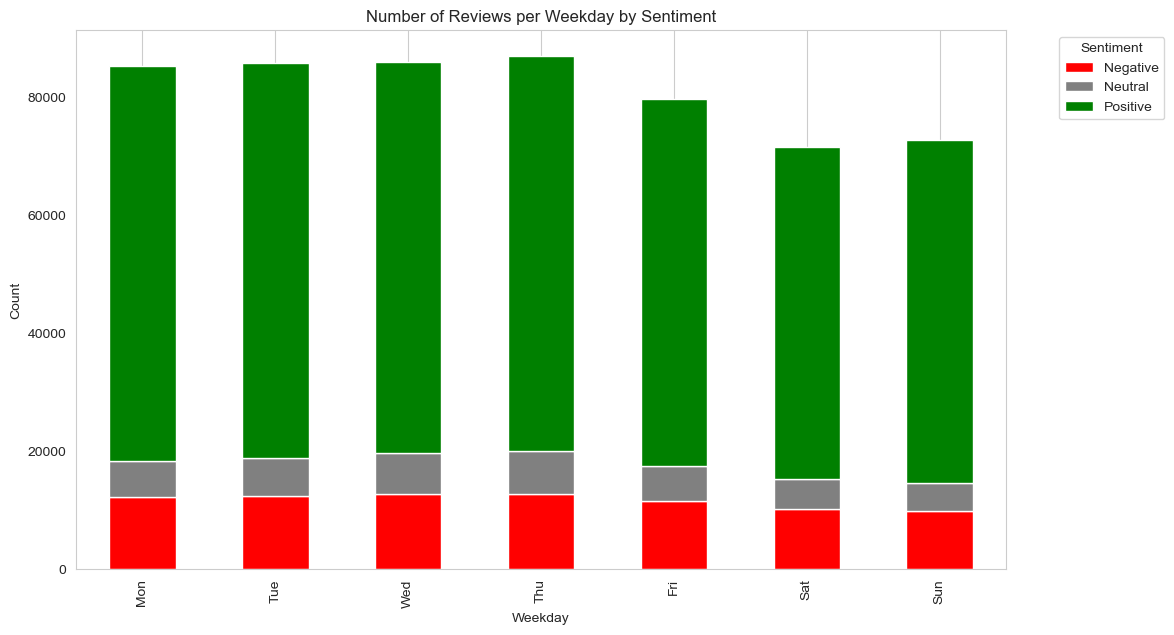

In [61]:
Review_df['Sentiment'] = Review_df['Score'].map({1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'})

# Group by Weekday_Label and Sentiment and count the number of reviews
weekday_sentiment_counts = Review_df.groupby(['Weekday_Label', 'Sentiment']).size().unstack(fill_value=0)

# Reorder the index to ensure the correct order of weekdays
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_sentiment_counts = weekday_sentiment_counts.loc[weekday_order]

# Plot the stacked bar plot
weekday_sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 7), color=['red', 'gray', 'green'])
plt.title('Number of Reviews per Weekday by Sentiment')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.grid(axis='y')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x700 with 0 Axes>

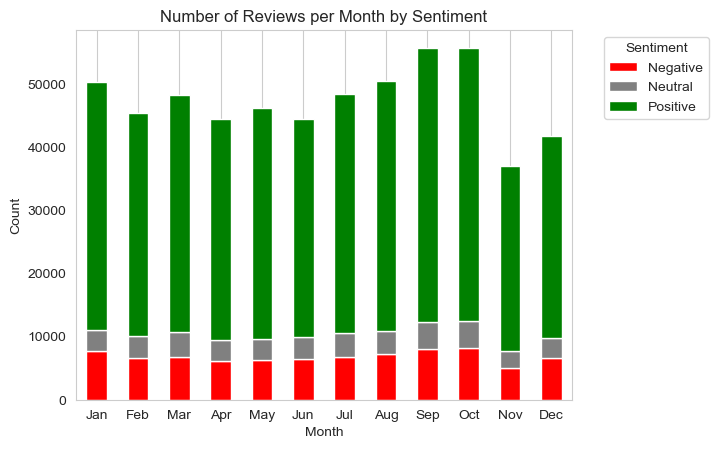

In [62]:
# Group by Month and Sentiment and count the number of reviews
month_sentiment_counts = Review_df.groupby(['Month', 'Sentiment']).size().unstack(fill_value=0)

# Reorder the index to ensure the correct order of months
month_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_sentiment_counts = month_sentiment_counts.loc[month_order]

# Plot the stacked bar plot
plt.figure(figsize=(12, 7))
month_sentiment_counts.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'])
plt.title('Number of Reviews per Month by Sentiment')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(axis='y')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

Each bar is divided into three segments representing negative, neutral, and positive sentiments. Reviews mostly made during weekdays, this might because of several courier are not operating during weekends. November and December may see a decrease in positive reviews due to factors like holiday stress, financial strain from holiday shopping, or dissatisfaction with products received as gifts.

## WordCloud

### Overview

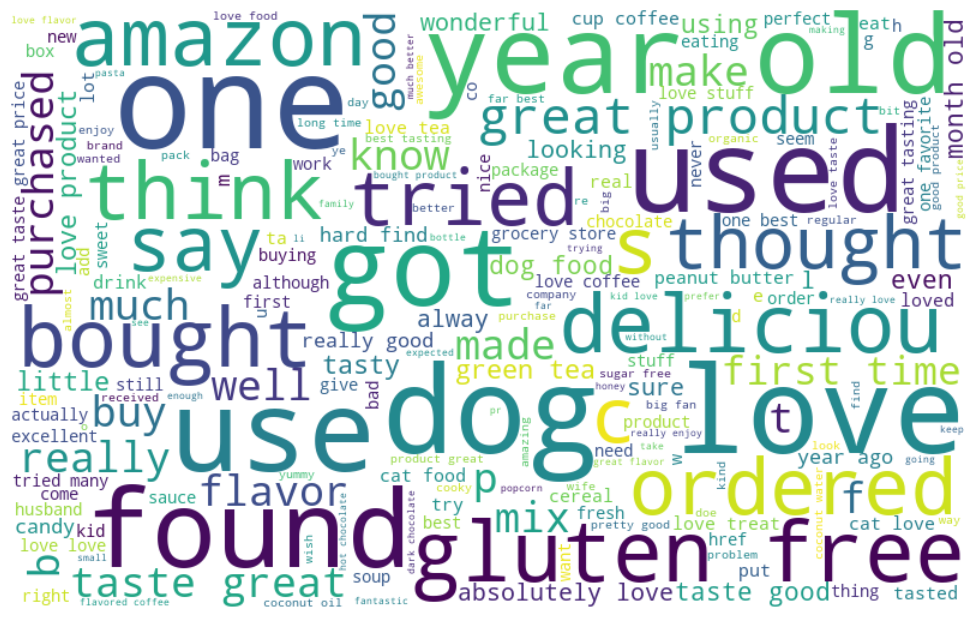

In [63]:
#Setting up Wordcloud on all review

fig = plt.figure(figsize = (12,6))
wordcloud = WordCloud(width=800, height=500, random_state=1, max_font_size=110,
                      background_color = 'white').generate(Review_df['Text'].to_string())

#Display plot
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In the wordcloud, it can be obeserved that majority of words are in positive or neutral can be found freqently such as
  - love
  - great
  - well
  - delicious
  - good
  - tasty

Some description of the products can found such as
  - dog
  - gluten free
  - year old
  - amazon
  - green tea


In order to have a clearer view on how sentiment calss can affecting the existance of words,  a separate wordclouds can be generated for positive and negative rating review.

### Positive Review

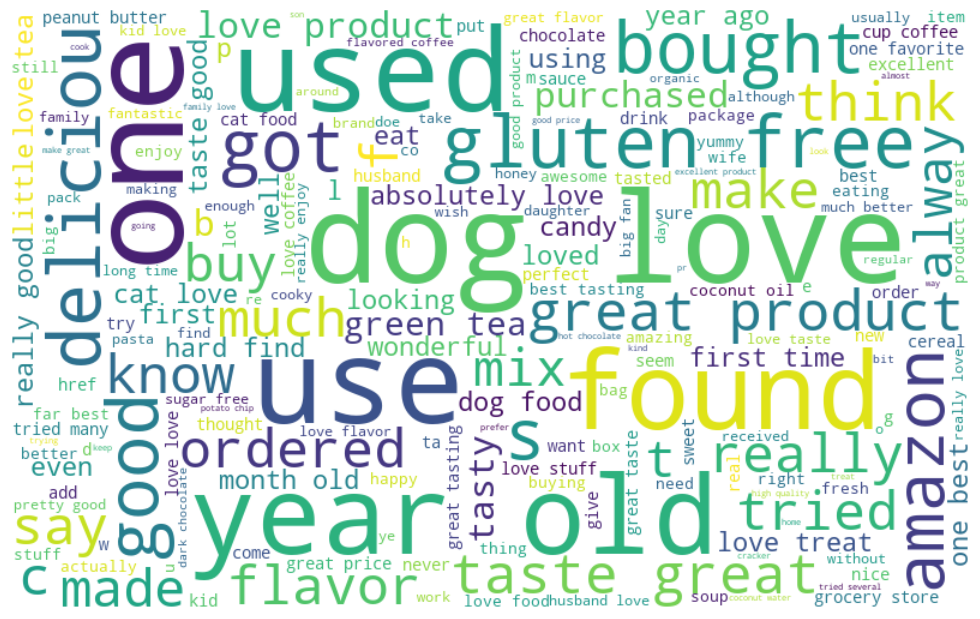

In [64]:
#Setting up Wordcloud on positive review

fig = plt.figure(figsize = (12,6))
wc_pos = WordCloud(width=800, height=500, random_state=2, max_font_size=110,
                   background_color = 'white').generate(Review_df[(Review_df['Sentiment']=='Positive')]['Text'].to_string())

#Display plot
plt.imshow(wc_pos, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

From the positive reviews, it is expecting to see positive words from the word cloud where it also proved by the word cloud
  - love
  - alway
  - really
  - deliciou
  - great
  - excellent

### Negative Review

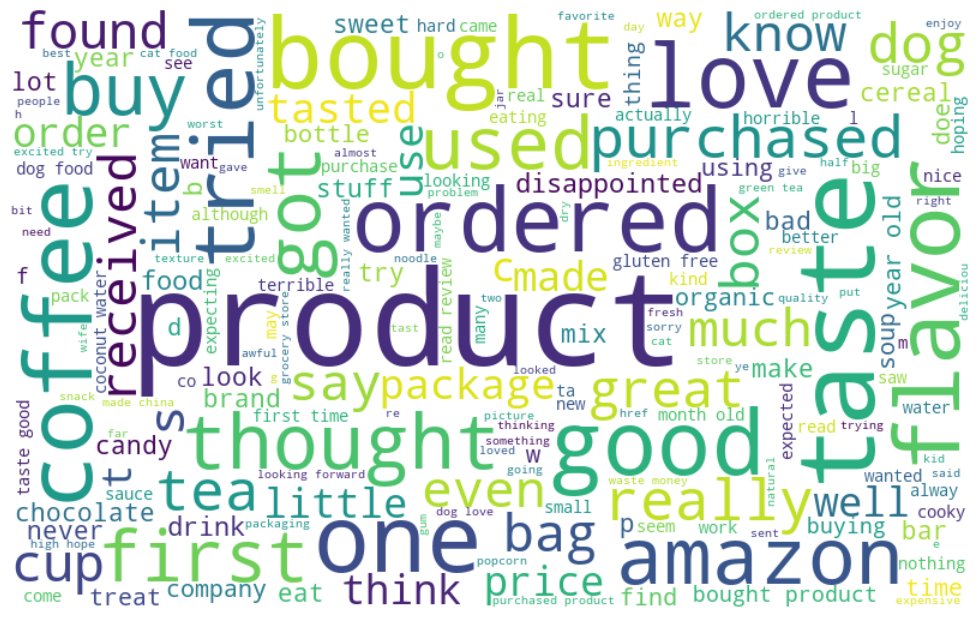

In [65]:
#Setting up Wordcloud on negative review
fig = plt.figure(figsize = (12, 6))
wc_pos = WordCloud(width=800, height=500, random_state=3, max_font_size=110,
                   background_color = 'white').generate(Review_df[(Review_df['Sentiment']=='Negative')]['Text'].to_string())

#Display plot
plt.imshow(wc_pos, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

From the negative reviews, it is expecting to see negative words from the word cloud where it also proved by the word cloud
  - horrible
  - bad
  - dissapointed
  - waste money
  - worst
  - hard
  - unfortunately

## Word Frequency

In [66]:
from collections import Counter

# Calculate the frequency of each word in the text data
word_freq = Counter([word for tokens in Review_df['Text'] for word in tokens])

# Group the frequencies based on the sentiment
sentiment_freq = {'Positive': Counter(), 'Neutral': Counter(), 'Negative': Counter()}
for index, row in Review_df.iterrows():
    sentiment = row['Sentiment']
    tokens = row['Text']
    sentiment_freq[sentiment].update(tokens)

# Get the top frequency words for each sentiment
top_freq_words = pd.DataFrame({sentiment: freq.most_common(10) for sentiment, freq in sentiment_freq.items()})
top_freq_words

,Positive,Neutral,Negative
0,"(like, 194763)","(like, 27486)","(like, 45563)"
1,"(good, 161542)","(taste, 23900)","(product, 42245)"
2,"(taste, 154396)","(flavor, 20107)","(taste, 40052)"
3,"(great, 150544)","(coffee, 19160)","(one, 30583)"
4,"(one, 146044)","(good, 18896)","(would, 26900)"
5,"(love, 145606)","(product, 18377)","(food, 25719)"
6,"(flavor, 142104)","(one, 16344)","(flavor, 25321)"
7,"(product, 139391)","(would, 15542)","(coffee, 23824)"
8,"(coffee, 133233)","(tea, 11742)","(good, 21860)"
9,"(tea, 124162)","(get, 10910)","(dog, 17972)"


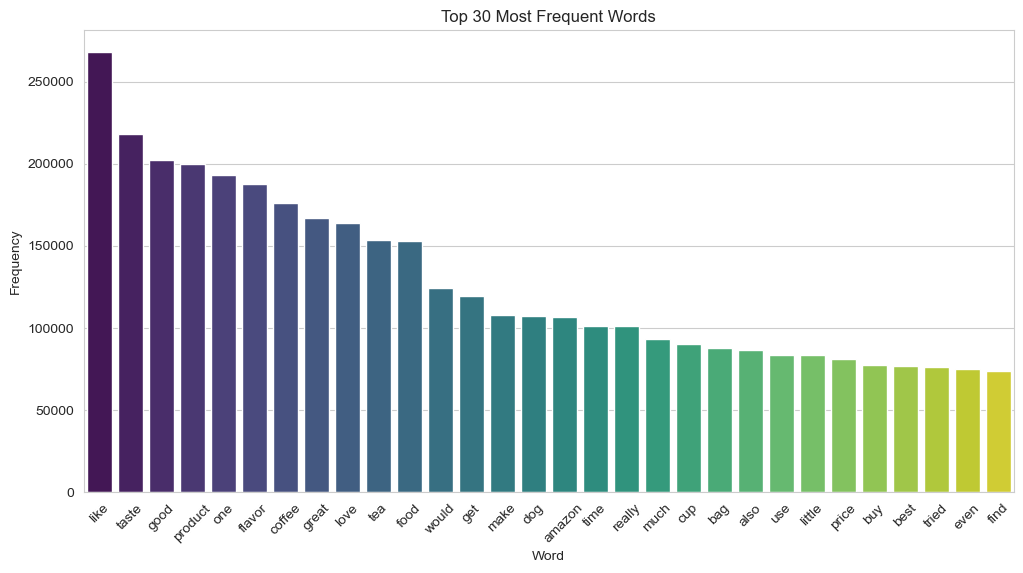

In [67]:
# Plot the top 30 most frequent words in reviews

top_30_word = dict(word_freq.most_common(30))

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_30_word.keys()), y=list(top_30_word.values()), palette='viridis')
plt.title('Top 30 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## Product_ID

In [68]:
# Group by ProductID and Sentiment and count the number of reviews
product = Review_df.groupby(['ProductId', 'Sentiment']).size().unstack(fill_value=0)
product = product[product.index.isin(pd.value_counts(Review_df['ProductId']).nlargest(10).index)]
product

Sentiment,Negative,Neutral,Positive
ProductId,,,
B0013NUGDE,59,46,459
B001EO5Q64,13,15,539
B001RVFERK,59,46,459
B0026KNQSA,59,46,459
B0026RQTGE,39,21,571
B002QWHJOU,39,21,571
B002QWP89S,39,21,571
B002QWP8H0,39,21,571
B003B3OOPA,13,25,585


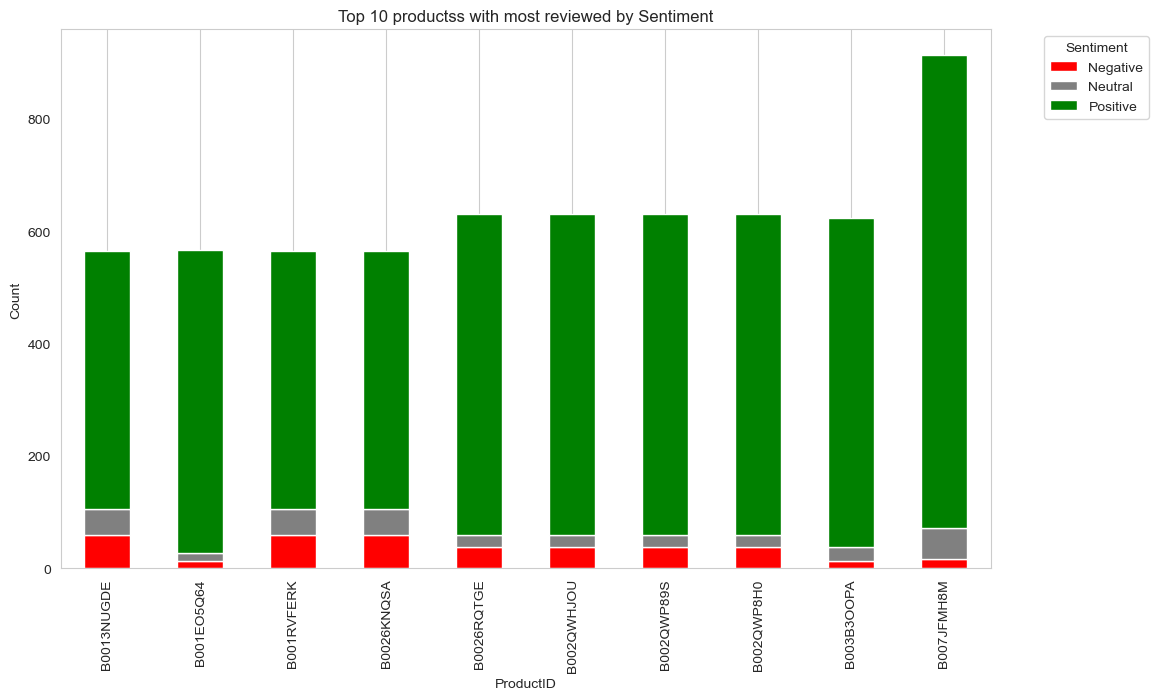

In [69]:
# Plot the stacked bar plot
product.plot(kind='bar', stacked=True, figsize=(12, 7), color=['red', 'gray', 'green'])
plt.title('Top 10 productss with most reviewed by Sentiment')
plt.xlabel('ProductID')
plt.ylabel('Count')
plt.grid(axis='y')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [70]:
pd.value_counts(Review_df['ProductId']).nlargest(10).index

Index(['B007JFMH8M', 'B002QWP89S', 'B002QWP8H0', 'B0026RQTGE', 'B002QWHJOU',
       'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE', 'B0026KNQSA', 'B001RVFERK'],
      dtype='object')

## UserId

In [71]:
# Group by UserID and Sentiment and count the number of reviews
User = Review_df.groupby(['UserId', 'Sentiment']).size().unstack(fill_value=0)
User = User[User.index.isin(pd.value_counts(Review_df['UserId']).nlargest(10).index)]
User

Sentiment,Negative,Neutral,Positive
UserId,,,
A1TMAVN4CEM8U8,2,8,194
A1YUL9PCJR3JTY,1,30,387
A1Z54EM24Y40LL,13,26,217
A281NPSIMI1C2R,0,19,346
A2MUGFV2TDQ47K,38,40,123
A3OXHLG6DIBRW8,4,23,420
A3PJZ8TU8FDQ1K,9,5,164
A3TVZM3ZIXG8YW,182,0,0
AQQLWCMRNDFGI,0,29,147


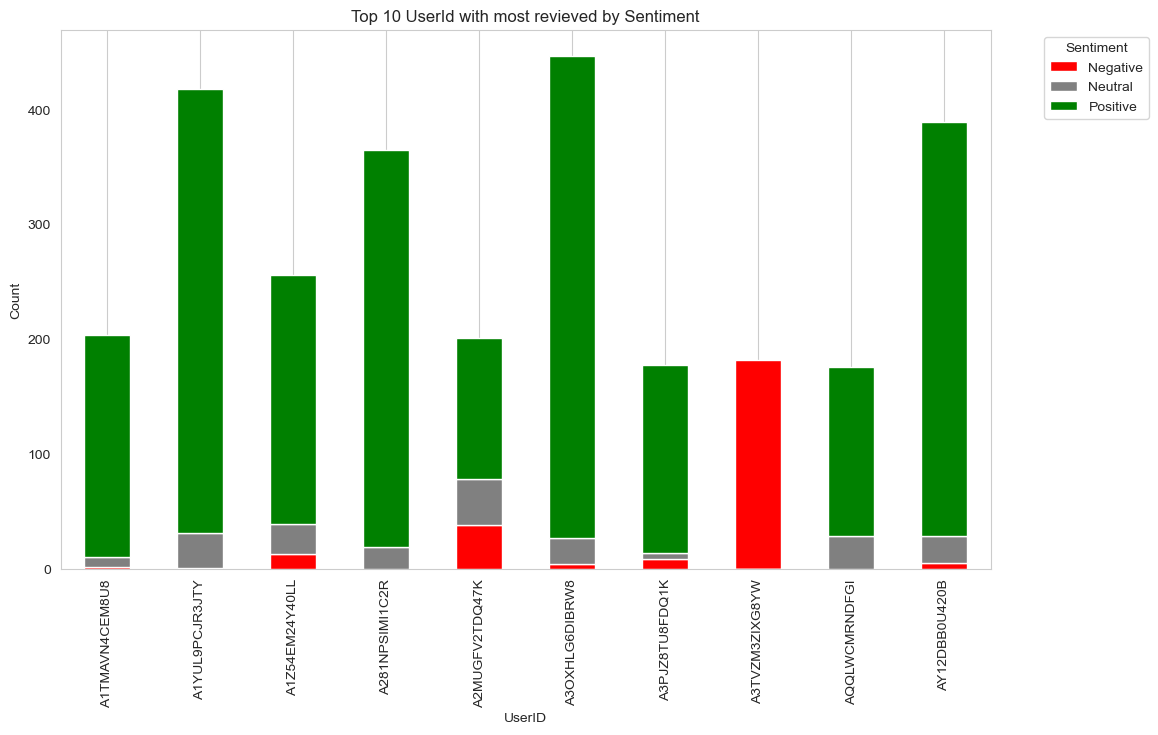

In [72]:
# Plot the stacked bar plot
User.plot(kind='bar', stacked=True, figsize=(12, 7), color=['red', 'gray', 'green'])
plt.title('Top 10 UserId with most revieved by Sentiment')
plt.xlabel('UserID')
plt.ylabel('Count')
plt.grid(axis='y')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [73]:
pd.value_counts(Review_df['UserId']).nlargest(10).index

Index(['A3OXHLG6DIBRW8', 'A1YUL9PCJR3JTY', 'AY12DBB0U420B', 'A281NPSIMI1C2R',
       'A1Z54EM24Y40LL', 'A1TMAVN4CEM8U8', 'A2MUGFV2TDQ47K', 'A3TVZM3ZIXG8YW',
       'A3PJZ8TU8FDQ1K', 'AQQLWCMRNDFGI'],
      dtype='object')

# Label Encoding

In [74]:
# Label Encoding Method to convert 'Sentiment' to numerical value

le = LabelEncoder()
le.fit(Review_df['Sentiment'])
Review_df['Sentiment'] = le.transform(Review_df['Sentiment'])

In [75]:
Review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568130 entries, 0 to 568129
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ProductId               568130 non-null  object        
 1   UserId                  568130 non-null  object        
 2   ProfileName             568130 non-null  object        
 3   HelpfulnessNumerator    568130 non-null  int16         
 4   HelpfulnessDenominator  568130 non-null  int16         
 5   Score                   568130 non-null  int8          
 6   Time                    568130 non-null  datetime64[ns]
 7   Summary                 568130 non-null  object        
 8   Text                    568130 non-null  object        
 9   Sentiment               568130 non-null  int64         
 10  Year                    568130 non-null  int64         
 11  Month                   568130 non-null  int64         
 12  Day                     568130

In [76]:
# Reduce dataframe size for training
Review_df['Sentiment'] =Review_df['Sentiment'].astype(np.int8)

In [77]:
Review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568130 entries, 0 to 568129
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ProductId               568130 non-null  object        
 1   UserId                  568130 non-null  object        
 2   ProfileName             568130 non-null  object        
 3   HelpfulnessNumerator    568130 non-null  int16         
 4   HelpfulnessDenominator  568130 non-null  int16         
 5   Score                   568130 non-null  int8          
 6   Time                    568130 non-null  datetime64[ns]
 7   Summary                 568130 non-null  object        
 8   Text                    568130 non-null  object        
 9   Sentiment               568130 non-null  int8          
 10  Year                    568130 non-null  int64         
 11  Month                   568130 non-null  int64         
 12  Day                     568130

In [78]:
# Label mapping

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Negative': 0, 'Neutral': 1, 'Positive': 2}


# Imbalanced Data Handling

By oversampling the minority classes and undersampling the majority class, the below steps aims to create a more balanced training set that can better represent the distribution of sentiment labels in the current dataset.

In [79]:
# Calculate imbalance counts and percentages for original data
original_counts = Review_df['Sentiment'].value_counts()
original_percentages = original_counts / len(Review_df) * 100
print("Original Data:")
print("Counts:")
print(original_counts)
print("Percentages (%):")
print(original_percentages)

Original Data:
Counts:
2    443552
0     81966
1     42612
Name: Sentiment, dtype: int64
Percentages (%):
2    78.072272
0    14.427332
1     7.500396
Name: Sentiment, dtype: float64


Based on the result, it can be clearly seen that 78% of the data distributed as positive whereas only 21% of the data distributed in negative and neutral reviews.

Hence, this result trigger the necessary of imbalance data handling.

### Data Splitting (Stratified)

It first removes an unnecessary feature from the DataFrame, then splits the balanced data into a training set for model training and a testing set for model evaluation using stratified method.

This dataset contain entries of 568120 after data preprocessing which is a large dataset. In order to shorten the training time and keep data balanced, the dataset is proposed to be split using stratified method.

In [80]:
from sklearn.model_selection import train_test_split

X = Review_df['Text']

Y = Review_df['Sentiment']

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 454504
Testing set size: 113626


# Word2Vec Model for Word Embedding
The Word2Vec model learns a high-dimensional representation of each word that captures its context in the corpus. The input data (in this case is 'Text' variable) will be transforming sentences to vectors. These word vectors can then be averaged to get a representation of a sentence (or document) that can be used as input to a machine learning model. The workers parameter allows the training process to be parallelized which can significantly speed up training time on large datasets.

- Word2Vec/Bag2Words/TF-IDF
- Vectorization / Tokening

In [81]:
%%time

# Train Word2Vec model on the text data using 80% training dataset

word2vec_model = Word2Vec(sentences=X_train.values, vector_size=100, window=10, min_count=1, workers=4)

CPU times: user 3min 22s, sys: 30.8 s, total: 3min 53s
Wall time: 1min 25s


### Vectorization using word2vec model
Each review is mapped to a feature vector by averaging the word embeddings of all words in the review

In [82]:
%%time

# Function to average the word vectors for each sentence (Average the word vectors for a set of words)
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64") # pre-initialize for speed
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

# Transforming training and testing data to vectors (Calculate average feature vectors for all reviews)
def averaged_word_vectorizer(review, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_reviews, model, vocabulary, num_features)
                    for tokenized_reviews in review]
    return np.array(features)

# Vectorizing the input data
X_train_vec = averaged_word_vectorizer(X_train, word2vec_model, 100)
X_test_vec = averaged_word_vectorizer(X_test, word2vec_model, 100)

CPU times: user 43.6 s, sys: 7.72 s, total: 51.3 s
Wall time: 54.2 s


Vectorization (Bag2Word) - Not in Used

In [83]:
# from sklearn.feature_extraction.text import CountVectorizer
# import gensim


## Bag2Word
# vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# X_train_vec = vectorizer.fit_transform(X_train.map(' '.join))
#print(X_train_vec.shape)

# vectorizer2 = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# X_test_vec = vectorizer2.fit_transform(X_test.map(' '.join))
# print(X_test_vec.shape)

## Word2Vec Analysis

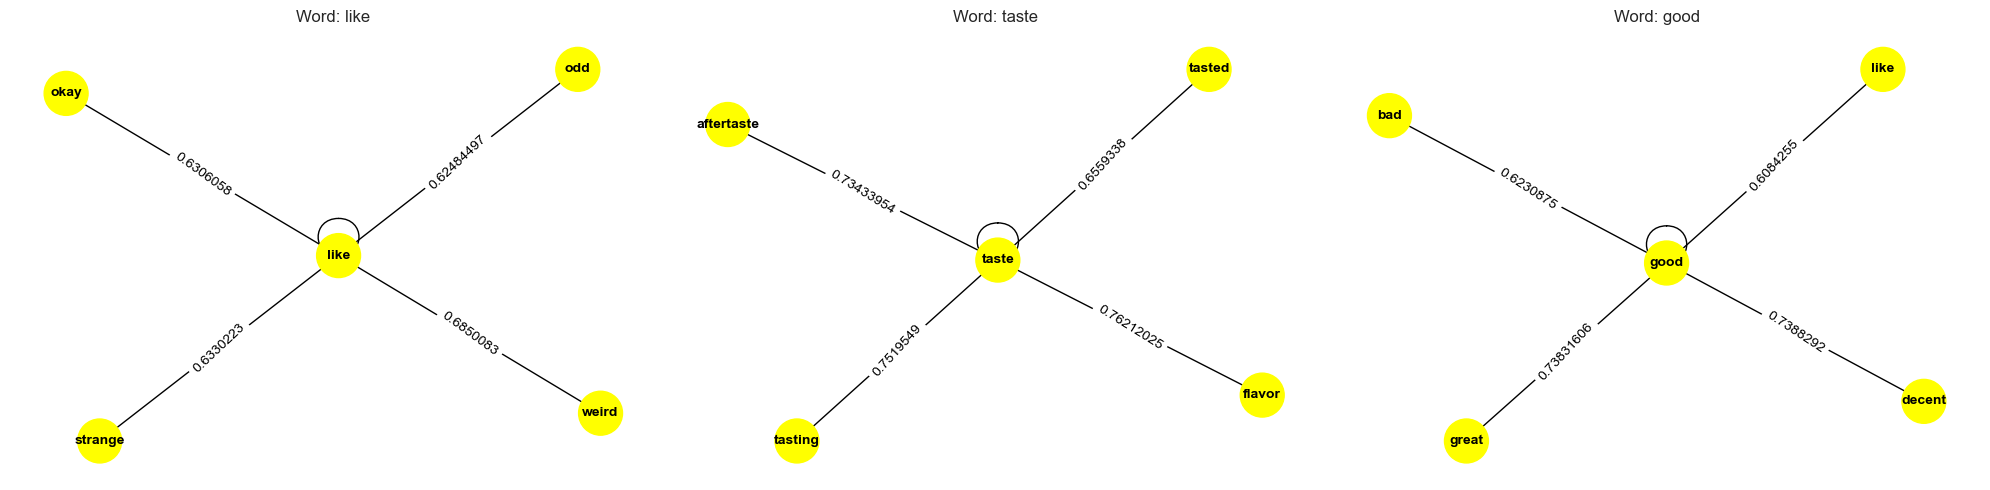

In [84]:
import networkx as nx
import matplotlib.pyplot as plt

# Words to visualize
words_to_visualize = ['like', 'taste', 'good']

# Create subplots for each word
fig, axs = plt.subplots(1, len(words_to_visualize), figsize=(20, 5))

for i, word in enumerate(words_to_visualize):
    # Create a graph
    G = nx.Graph()

    # Add nodes for the word and the top 3 most similar words
    G.add_node(word, color='yellow', size=3000)
    top_similar_words = sorted(word2vec_model.wv.index_to_key, key=lambda x: -word2vec_model.wv.similarity(word, x))[:5]
    for top_word in top_similar_words:
        G.add_node(top_word, color='yellow', size=1000)

    # Add edges between the word and the top 3 most similar words based on similarity
    for top_word in top_similar_words:
        similarity = word2vec_model.wv.similarity(word, top_word)
        G.add_edge(word, top_word, weight=similarity)

    # Draw the graph
    pos = nx.spring_layout(G, seed=42)  # Positions for all nodes
    node_colors = [G.nodes[node]['color'] for node in G.nodes]
    node_sizes = [G.nodes[node]['size'] for node in G.nodes]
    nx.draw(G, pos, ax=axs[i], with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=10, font_weight="bold")
    axs[i].set_title(f"Word: {word}")

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=axs[i])

plt.tight_layout()
plt.show()

In [85]:
# total no of extract words
print("Vocab size : ", len(word2vec_model.wv.key_to_index))

Vocab size :  94969


The vocabulary in the word2vec model is 95084 words contained in the model for machine learning in later part.

In [86]:
import itertools

vocab = word2vec_model.wv.key_to_index

# Show the first 5 vocab
dict(itertools.islice(vocab.items(), 5))

{'like': 0, 'taste': 1, 'good': 2, 'product': 3, 'one': 4}

In [87]:
pd.DataFrame(vocab.keys())

,0
0,like
1,taste
2,good
3,product
4,one
...,...
94964,rawsome
94965,eonomical
94966,duro
94967,pekeingese


In [88]:
# 100 features
len(word2vec_model.wv['like'])

100

This showed that there are 100 words connected to 1 words based on similary due to vector size set as 100.

In [89]:
word1 = 'good'
word2 = 'bad'

# Check if both words are in the vocabulary
if word1 in word2vec_model.wv.index_to_key and word2 in word2vec_model.wv.index_to_key:
    similarity_score = word2vec_model.wv.similarity(word1, word2)
    print(f"Similarity between '{word1}' and '{word2}': {similarity_score}")
else:
    print("One or both words not present in the vocabulary.")

Similarity between 'good' and 'bad': 0.6230875253677368


In [90]:
# View similar word

similar_words = {search_term: [item[0] for item in word2vec_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['good','like','taste']}
similar_words

{'good': ['decent', 'great', 'bad', 'like', 'nice'],
 'like': ['weird', 'strange', 'okay', 'odd', 'good'],
 'taste': ['flavor', 'tasting', 'aftertaste', 'tasted', 'texture']}

# Model Development

## Random Forest

The below steps has proceed to train the Random Forest and make prediction with parallel approach to reduce execution time.

Reason of using Random Forest:
1. Handling of High Dimensionality:\
Text data that has performed vectorized (like TF-IDF or Word2Vec) often results in high-dimensional sparse matrices. Random Forest can handle such high-dimensional data effectively.

2. Model Interpretability:\
Random Forests are still more interpretable than many other algorithms like SVMs or Neural Networks even though it is not as interpretable as a single decision tree,

3. Efficiency with Unbalanced Data:\
In sentiment analysis, often the data can be unbalanced (e.g., more positive reviews than negative). Random Forests can handle unbalanced datasets by adjusting the class weights.

4. No Need for Input Scaling:\
Random Forest does not require input scaling or normalization which simplifies the preprocessing step.

5. Parallelizable:\
The training of the individual trees can be parallelized as the individual trees are independent of each other which can be advantageous when dealing with large datasets.


Below are the parameters for random forest classifier

1. n_estimators
  - The number of trees in the forest.
2. criterion
  - The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain
3. max_depth
  - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
4. min_samples_split
  - The minimum number of samples required to split an internal node
5. min_samples_leaf
  - The minimum number of samples required to be at a leaf node
6. min_weight_fraction
  - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
7. max_features
  - The number of features to consider when looking for the best split.
8. max_leaf_nodes
  - Grow trees with max_leaf_nodes in best-first fashion.
9. min_impurity_decrease
  - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

In [91]:
%%time

# Default Parameter
# n_estimators = 100
# criterion = 'gini'
# max_depth = None
# min_samples_split = 2
# min_samples_leaf = 1
# min_weight_fraction_leaf = 0
# max_features = 'sqrt'
# max_leaf_nodes = None
# min_impurity_decrease = 0


# Train Random Forest classifier in parallel
with parallel_backend('threading', n_jobs=-1):
    rf_classifier = RandomForestClassifier(random_state=1,verbose=2)
    rf_classifier.fit(X_train_vec, y_train)
# verbose=2 to show progress model training and development (number of tress developing out of 100 of trees)

# Make predictions and calculate predicted probabilities
with parallel_backend('threading', n_jobs=-1):
    y_pred_rf = rf_classifier.predict(X_test_vec)
    y_pred_prob_rf = rf_classifier.predict_proba(X_test_vec)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.8s


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s


CPU times: user 14min 19s, sys: 4.61 s, total: 14min 24s
Wall time: 1min 55s


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


In [92]:
# Evaluate the model
report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.64      0.74     16393
           1       0.99      0.38      0.55      8522
           2       0.89      0.99      0.94     88711

    accuracy                           0.89    113626
   macro avg       0.92      0.67      0.74    113626
weighted avg       0.90      0.89      0.88    113626



Based on the prediction and evaluation, the accuracy of the random forest model at random state 1 is 89%, whereas up to 90% of precision and recall.

Consequently, no further finetuning is needed and model can be further used.

In [93]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')  # Use y_pred_rf here
f1 = f1_score(y_test, y_pred_rf, average='weighted')

# y_pred_prob_rf is a list of arrays containing probabilities for each class
y_pred_prob_positive_class = y_pred_prob_rf

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob_positive_class, multi_class='ovr')

# Store metrics in a DataFrame
metrics_rf = pd.DataFrame({
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1],
    'ROC AUC': [roc_auc]
})

In [94]:
# Print the results
print("Accuracy:", metrics_rf['Accuracy'].values[0])
print("Precision:", metrics_rf['Precision'].values[0])
print("Recall:", metrics_rf['Recall'].values[0])
print("F1-Score:", metrics_rf['F1-Score'].values[0])
print("ROC AUC:", metrics_rf['ROC AUC'].values[0])


Accuracy: 0.8946983964937603
Precision: 0.8984582834486723
Recall: 0.8946983964937603
F1-Score: 0.8819624645384108
ROC AUC: 0.9389631432323249


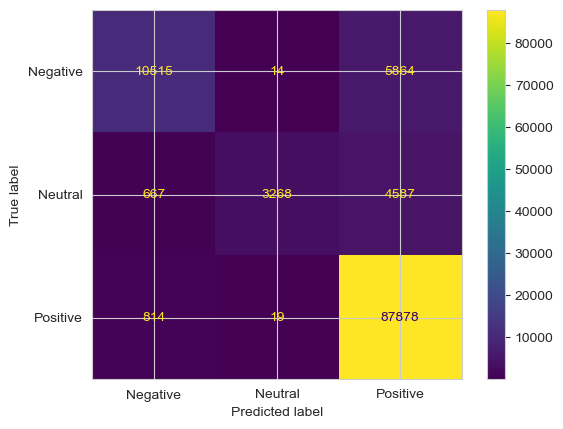

In [95]:
# Confusion Matrix

from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels=['Negative','Neutral','Positive'])
cm_display.plot()
plt.show()

## Decision Tree

The below steps has proceed to train the Decision Tree and make prediction with parallel approach to reduce execution time.

1. Interpretability:\
Decision trees are inherently interpretable. The model structure resembles a flowchart, where each node represents a decision based on a feature (word or term) and each branch leads to a possible sentiment class. This allows easy to understand the reasoning behind the predictions of the model.

2. Handling Categorical Features:\
Text data is naturally composed of categorical features (words). Decision trees can natively handle these features without requiring additional processing like feature encoding (converting text to numerical values).

3. Non-Linear Relationships:\
While sentiment often involves some semantic relationships, it may not be strictly linear. Decision trees abel to capture non-linear relationships between words and sentiment by making consecutive branching decisions based on different features.

4. Efficiency:\
Decision trees can be relatively efficient to train and use which making it suitable for large datasets or applications requiring fast predictions. In this case, the data is relatively large (189373 entries).

Hence, the model choose to use in this dataset.

Parameter of Decision Tree is similar to random forest where only some difference such as splitter parameter

1. splitter
  - The strategy used to choose the split at each node.





In [96]:
%%time

# Default Parameter

# criterion = 'gini'
# splitter = 'best'
# max_depth = None
# min_samples_split = 2
# min_samples_leaf = 1
# min_weight_fraction_leaf = 0
# max_features = None
# max_leaf_nodes = None
# min_impurity_decrease = 0


# Train Decision Tree classifier in parallel
with parallel_backend('threading', n_jobs=-1):
    dt_classifier = DecisionTreeClassifier(random_state=1)
    dt_classifier.fit(X_train_vec, y_train)

# Make predictions
with parallel_backend('threading', n_jobs=-1):
    y_pred_dt = dt_classifier.predict(X_test_vec)
    y_pred_prob_dt = dt_classifier.predict_proba(X_test_vec)


CPU times: user 1min 37s, sys: 401 ms, total: 1min 37s
Wall time: 1min 38s


In [97]:
# Evaluate the model
report = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64     16393
           1       0.43      0.48      0.45      8522
           2       0.91      0.90      0.91     88711

    accuracy                           0.83    113626
   macro avg       0.66      0.68      0.67    113626
weighted avg       0.84      0.83      0.83    113626



Based on the prediction and evaluation, the accuracy of the decision tree model at random state 1 having up to 83% of accuracy with a 83% of precision and recall.

Consequently, no further finetuning is needed and model can be further used.

In [98]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')  # Use y_pred_dt here
f1 = f1_score(y_test, y_pred_dt, average='weighted')

# y_pred_prob_dt is a list of arrays containing probabilities for each class
y_pred_prob_positive_class = y_pred_prob_dt

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob_positive_class, multi_class='ovr')

# Store metrics in a DataFrame
metrics_dt = pd.DataFrame({
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1],
    'ROC AUC': [roc_auc]
})

In [99]:
# Print the results
print("Accuracy:", metrics_dt['Accuracy'].values[0])
print("Precision:", metrics_dt['Precision'].values[0])
print("Recall:", metrics_dt['Recall'].values[0])
print("F1-Score:", metrics_dt['F1-Score'].values[0])
print("ROC AUC:", metrics_dt['ROC AUC'].values[0])

Accuracy: 0.8314646295742172
Precision: 0.8365053492207327
Recall: 0.8314646295742172
F1-Score: 0.8338350082418684
ROC AUC: 0.7679779070589511


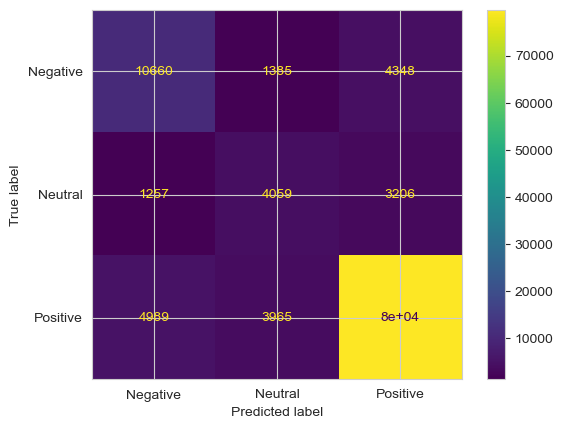

In [100]:
# Confusion Matrix

from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_test, y_pred_dt)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_dt, display_labels=['Negative','Neutral','Positive'])
cm_display.plot()
plt.show()

## Logistic Regression Classifier

1. Simplicity:\
Logistic regression is a well-understood and relatively simple algorithm compared to more complex models like Neural Networks. This makes it easier to interpret the results and understand how the model arrives at its predictions. It also requires less computational power to train compared to complex models which making it suitable for resource-constrained environments.

2. Efficiency:\
Logistic regression works well with smaller datasets which are common in many sentiment analysis tasks. It can learn effective patterns from a limited amount of data. Training is generally faster compared to complex models, allowing for quicker experimentation and iteration.

3. Interpretability:\
Unlike some black-box models, logistic regression provides coefficients for each feature (word) in the text. This allows to understand which words or phrases are most influential in predicting sentiment. This interpretability can be valuable for debugging and improving thew model.

4. Baseline Performance:\
Logistic regression often serves as a good baseline model for sentiment analysis. Even though more complex models might achieve higher accuracy, logistic regression provides a solid starting point and can be surprisingly effective in many cases.

Parameter for Logistic Regression

1. penalty
- Specify the norm of the penalty
  - None: no penalty is added;
  - 'l2': add a L2 penalty term and it is the default choice;
  - 'l1': add a L1 penalty term;
  - 'elasticnet': both L1 and L2 penalty terms are added.

2. tol
  - Tolerance for stopping criteria.
3. C
  - Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
4. solver
  - Algorithm to use in the optimization problem.
5. max_iter
  - Maximum number of iterations taken for the solvers to converge.


In [101]:
%%time

# Default Parameter

# penalty = l2
# tol = 1e-4
# C = 1
# solver = 'lbfgs'
# max_iter = 100


# Train Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=1)
logreg_classifier.fit(X_train_vec, y_train)

# Make predictions
y_pred_logreg = logreg_classifier.predict(X_test_vec)
y_pred_prob_logreg = logreg_classifier.predict_proba(X_test_vec)


CPU times: user 57.1 s, sys: 11 s, total: 1min 8s
Wall time: 9.19 s


In [102]:
# Evaluate the model
report = classification_report(y_test, y_pred_logreg)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.59      0.64     16393
           1       0.38      0.05      0.09      8522
           2       0.87      0.97      0.92     88711

    accuracy                           0.84    113626
   macro avg       0.65      0.54      0.55    113626
weighted avg       0.81      0.84      0.81    113626



Based on the prediction and evaluation, the accuracy of the logistic regression model at random state 1, up to 84% of accuracy.

Consequently, no further finetuning is needed and model can be further used.

In [103]:
# Calculate metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
roc_auc_logreg = roc_auc_score(y_test, y_pred_prob_logreg, multi_class='ovr')

# Store metrics in a DataFrame
metrics_logreg = pd.DataFrame({
    'Accuracy': [accuracy_logreg],
    'Precision': [precision_logreg],
    'Recall': [recall_logreg],
    'F1-Score': [f1_logreg],
    'ROC AUC': [roc_auc_logreg]
})

In [104]:
# Print the results
print("Accuracy:", metrics_logreg['Accuracy'].values[0])
print("Precision:", metrics_logreg['Precision'].values[0])
print("Recall:", metrics_logreg['Recall'].values[0])
print("F1-Score:", metrics_logreg['F1-Score'].values[0])
print("ROC AUC:", metrics_logreg['ROC AUC'].values[0])

Accuracy: 0.8433193107211377
Precision: 0.8073825509223035
Recall: 0.8433193107211377
F1-Score: 0.8133684910600276
ROC AUC: 0.8802557667731586


# Model Evaluation

The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score is a measure of the area under the ROC curve which plots the true positive rate against the false positive rate for different thresholds of the classification model. A higher ROC AUC score indicates better performance of the model in distinguishing between classes.


1. Random Forest:\
The Descision Tree model have the highest ROC AUC scores (0.9387). This is indicating excellent performance in distinguishing between the positive and negative classes.\
This high ROC AUC score suggests that these models have a high true positive rate while maintaining a low false positive rate which is desirable in many classification tasks.

2. Logistic Regression:\
The Logistic Regression model have the relatively higher ROC AUC scores (0.8794) compare with Decision Tree model. This is indicating excellent performance in distinguishing between the positive and negative classes.\
This high ROC AUC score suggests that these models have a high true positive rate while maintaining a low false positive rate which is desirable in many classification tasks.

2. Decision Tree:\
The Decision Tree model has a much lower ROC AUC score of 0.7639 .It indicates poorer performance compared to Random Forest and Logistic Regression models in distinguishing between the positive and negative classes.\
The lower ROC AUC score suggests that the Decision Tree model has a higher false positive rate or a lower true positive rate compared to the other models.

### ROC

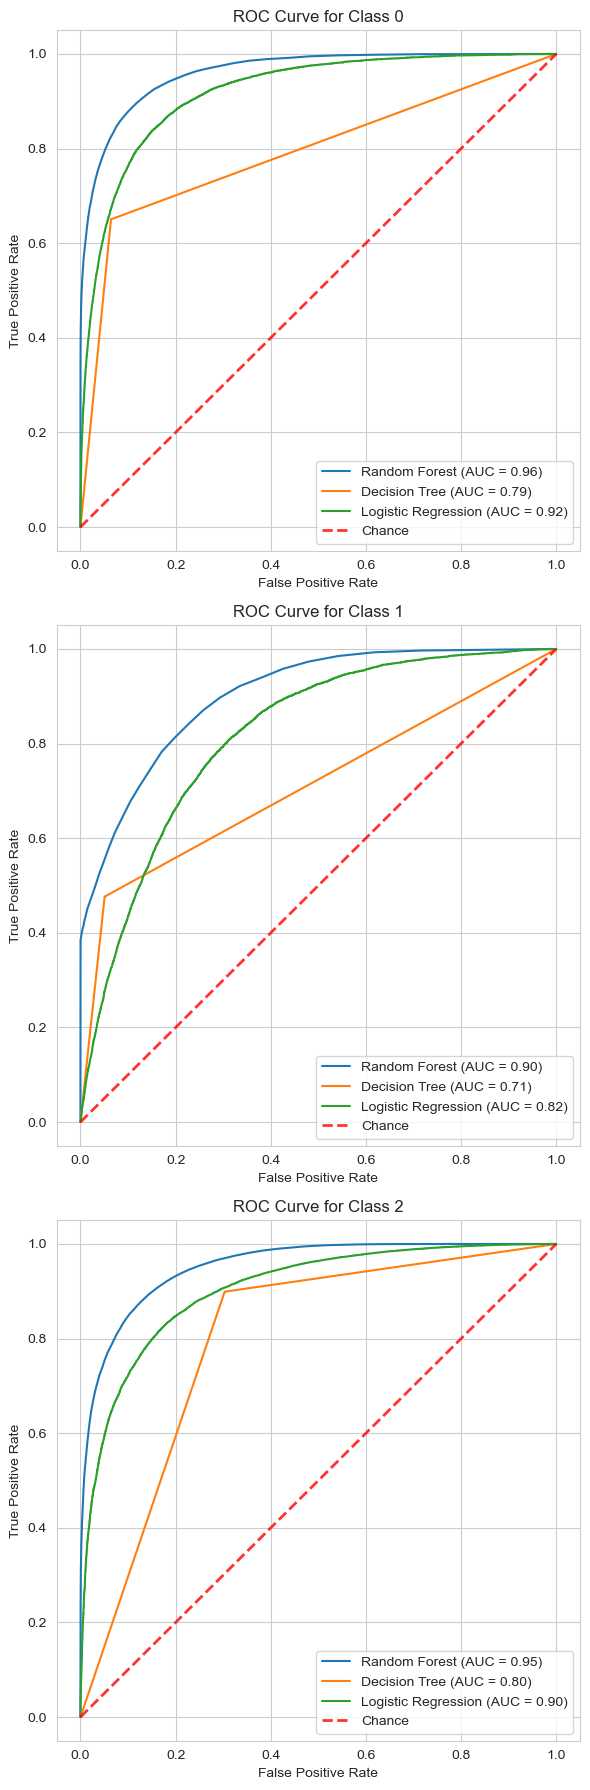

In [105]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_binarized.shape[1]

# Combine predictions and probabilities from all models
y_pred_probs = [y_pred_prob_rf, y_pred_prob_dt, y_pred_prob_logreg]

plt.figure(figsize=(6, 18))

for i, cls in enumerate([0,1,2]):
    plt.subplot(3, 1, i+1)
    plt.subplots_adjust(hspace=0.5)
    plt.title(f'ROC Curve for Class {cls}')

    for y_pred_prob, label in zip(y_pred_probs, ['Random Forest', 'Decision Tree', 'Logistic Regression']):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

plt.tight_layout()
plt.show()

1. Random Forest Classifier:\
The model has an accuracy of 0.89 which means it correctly classified about 89% of the instances in the test set.
The precision for each class (Negative, Neutral, Positive) is very high (0.88, 0.99, 0.89). This is indicating that the model is very good at not misclassifying other classes as the given class.
The recall for each class is imbalance (0.63, 0.38, 0.99). This may due to the nature of imbalance data.
The F1-score is the harmonic mean of precision and recall which is high for all classes (0.73, 0.55, 0.94). This shows a good balance between precision and recall.
The ROC AUC score is 0.9387 which is close to 1 which reveals that the model has a high discriminative power.

2. Logistic Regression Classifier:\
The Logistic Regression model has an accuracy of 0.84 which means it correctly classified about 84% of the instances in the test set.
The precision for each class (Negative, Neutral, Positive) is very high (0.69, 0.37, 0.87). This is indicating that the model is done well on class postive but performed relatively poor on Negative and Neutral.
The recall for each class is imbalance (0.59, 0.05, 0.97). This may due to the nature of imbalance data.
The F1-score is the harmonic mean of precision and recall which is high for all classes (0.63, 0.09, 0.91). This shows a good balance between precision and recall. The ROC AUC score is 0.8794 which is relatively well performance compare with Decision Tree Classifier which reveals that the model has a relatively high discriminative power.


3. Decision Tree Classifier:\
The model has a much lower accuracy of 0.83 which shows that it correctly classified only about 83% of the instances in the test set.
The precision, recall, and F1-score for each class are also slightly lower than the other two models. This may shows that the Decision Tree Classifier is not performing as well as other two models on this dataset.
The ROC AUC score is 0.7639 which is slightly better than random guessing (0.5), but it shows lower than the other two models.



### Performance Metrics

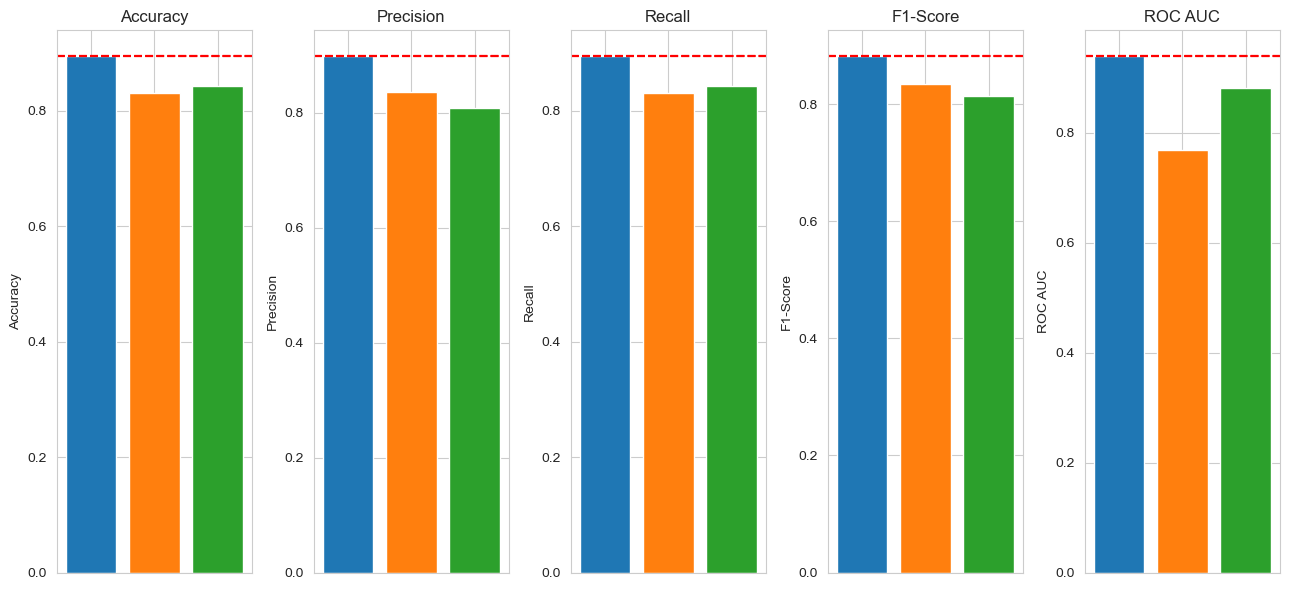

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Combine all result DataFrames
all_metrics = pd.concat([metrics_rf, metrics_dt, metrics_logreg], keys=['Random Forest', 'Decision Tree', 'Logistic Regression'])

# Create subplots
fig, axs = plt.subplots(1,5, figsize=(13,6))

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score','ROC AUC']):
    for j, model in enumerate(['Random Forest', 'Decision Tree', 'Logistic Regression']):
        axs[i].bar(model, all_metrics.loc[model][metric].values[0])
        axs[i].set_ylabel(metric)
        axs[i].set_title(metric)
        axs[i].axhline(all_metrics.loc[all_metrics[metric].idxmax()][metric],color='red',ls='--')

for i in range(5):
  axs[i].set_xticks(axs[i].get_xticks())
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()

**Random Forest**

1. Random Forest achieved good performance across all sentiment classes.
2. It has high True Positive (TP) count for all classes which indicates that it correctly classified the most instances of each sentiment.
3. It also has a relatively high True Negative (TN) count, this means that it correctly classified non-positive instances.
4. The False Positive (FP) count is very low which meaning it misclassify very few non-positive instances as positive.
5. The False Negative (FN) count is also relatively low which indicating it did not missed too many positive instances.

**Decision Tree**

1. Decision Tree performed similar well as Random Forest but with slightly lower counts for TP, TN, FP, and FN.
2. The overall performance is very close to Random Forest which shows that the Decision Tree model is also effective for this case.

**Logistic Regression**

1. Logistic Regression has lower TP counts for all classes compared to Random Forest and Decision Tree. This reveals that it correctly classified fewer instances of each sentiment.
2. It has a very high FP count for Negative and Neutral sentiments. This indicates that the model misclassified many non-positive instances as positive.
3. The FN count is also high for all classes which reveals that the model missed many positive instances.

In conclusion, Random Forest generally outperformed Decision Tree and Logistic Regression in this scenario. It is achieving higher overall accuracy and better performance across different sentiment classes.

### Confusion Metrics

The plot below shows the confusion matrix for 'Negative', 'Neutral', 'Positive' under Random Forest, Decision Tree, and Logistic Regression Classifiers.


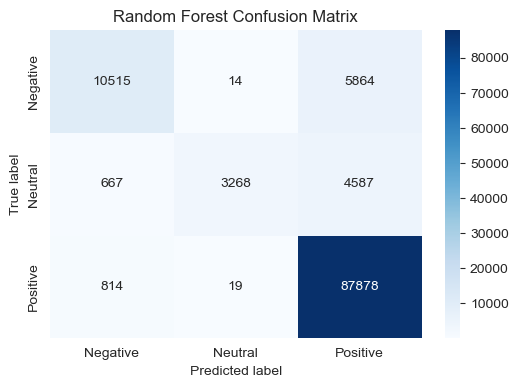

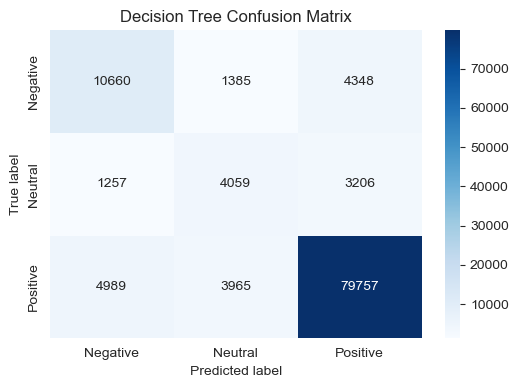

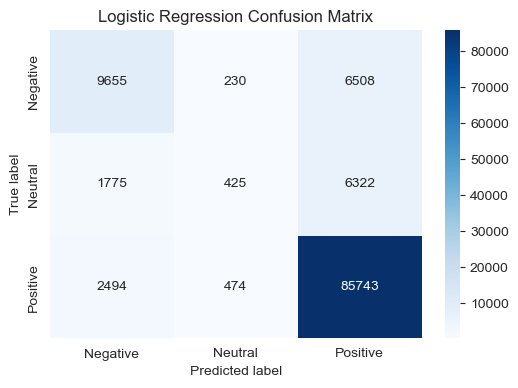

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(conf_mat, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Random Forest
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(conf_mat_rf, 'Random Forest Confusion Matrix')

# Decision Tree
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrix(conf_mat_dt, 'Decision Tree Confusion Matrix')

# Logistic Regression
conf_mat_logreg = confusion_matrix(y_test, y_pred_logreg)
plot_confusion_matrix(conf_mat_logreg, 'Logistic Regression Confusion Matrix')


In [108]:
# Function to calculate TP, TN, FP, FN for each class
def calculate_confusion_values(conf_mat):
    tp = np.diag(conf_mat)
    fp = np.sum(conf_mat, axis=0) - tp
    fn = np.sum(conf_mat, axis=1) - tp
    tn = np.sum(conf_mat) - (fp + fn + tp)
    return tp, tn, fp, fn

# Calculate confusion values for Random Forest
tp_rf, tn_rf, fp_rf, fn_rf = calculate_confusion_values(conf_mat_rf)

# Calculate confusion values for Decision Tree
tp_dt, tn_dt, fp_dt, fn_dt = calculate_confusion_values(conf_mat_dt)

# Calculate confusion values for Logistic Regression
tp_logreg, tn_logreg, fp_logreg, fn_logreg = calculate_confusion_values(conf_mat_logreg)

# Display the values
print("Random Forest:")
print("Negative - TP: {}, TN: {}, FP: {}, FN: {}".format(tp_rf[0], tn_rf[0], fp_rf[0], fn_rf[0]))
print("Neutral   - TP: {}, TN: {}, FP: {}, FN: {}".format(tp_rf[1], tn_rf[1], fp_rf[1], fn_rf[1]))
print("Positive  - TP: {}, TN: {}, FP: {}, FN: {}".format(tp_rf[2], tn_rf[2], fp_rf[2], fn_rf[2]))
print()
print("Decision Tree:")
print("Negative - TP: {}, TN: {}, FP: {}, FN: {}".format(tp_dt[0], tn_dt[0], fp_dt[0], fn_dt[0]))
print("Neutral   - TP: {}, TN: {}, FP: {}, FN: {}".format(tp_dt[1], tn_dt[1], fp_dt[1], fn_dt[1]))
print("Positive  - TP: {}, TN: {}, FP: {}, FN: {}".format(tp_dt[2], tn_dt[2], fp_dt[2], fn_dt[2]))
print()
print("Logistic Regression:")
print("Negative - TP: {}, TN: {}, FP: {}, FN: {}".format(tp_logreg[0], tn_logreg[0], fp_logreg[0], fn_logreg[0]))
print("Neutral   - TP: {}, TN: {}, FP: {}, FN: {}".format(tp_logreg[1], tn_logreg[1], fp_logreg[1], fn_logreg[1]))
print("Positive  - TP: {}, TN: {}, FP: {}, FN: {}".format(tp_logreg[2], tn_logreg[2], fp_logreg[2], fn_logreg[2]))


Random Forest:
Negative - TP: 10515, TN: 95752, FP: 1481, FN: 5878
Neutral   - TP: 3268, TN: 105071, FP: 33, FN: 5254
Positive  - TP: 87878, TN: 14464, FP: 10451, FN: 833

Decision Tree:
Negative - TP: 10660, TN: 90987, FP: 6246, FN: 5733
Neutral   - TP: 4059, TN: 99754, FP: 5350, FN: 4463
Positive  - TP: 79757, TN: 17361, FP: 7554, FN: 8954

Logistic Regression:
Negative - TP: 9655, TN: 92964, FP: 4269, FN: 6738
Neutral   - TP: 425, TN: 104400, FP: 704, FN: 8097
Positive  - TP: 85743, TN: 12085, FP: 12830, FN: 2968


True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.

False Positives (FP) – When actual class is no and predicted class is yes.

False Negatives (FN) – When actual class is yes but predicted class in no.

In [109]:
all_metrics

,,Accuracy,Precision,Recall,F1-Score,ROC AUC
Random Forest,0,0.894698,0.898458,0.894698,0.881962,0.938963
Decision Tree,0,0.831465,0.836505,0.831465,0.833835,0.767978
Logistic Regression,0,0.843319,0.807383,0.843319,0.813368,0.880256


### K-fold Cross Validate on performance(accurcy)

K-fold cross-validation is a technique for evaluating predictive models. The dataset is divided into k subsets or folds.

The model is trained and evaluated k times which is using a different fold as the validation set each time.

Performance metrics from each fold are averaged to estimate the model’s generalization performance.

This method aids in model assessment, selection, and hyperparameter tuning, providing a more reliable measure of a model’s effectiveness and performance consistency.

In [110]:
# import library for cross validation score to evalute score and Kfold
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [111]:
%%time

#cv=5, kfold=5
score_rf = cross_val_score(RandomForestClassifier(), X_train_vec, y_train, cv=KFold(n_splits=5),verbose=2)
print(score_rf)
print('Avg :', np.average(score_rf))

[CV] END .................................................... total time= 6.7min
[CV] END .................................................... total time= 6.7min
[CV] END .................................................... total time= 6.7min
[CV] END .................................................... total time= 6.7min
[CV] END .................................................... total time= 6.7min
[0.89159635 0.88963818 0.89117831 0.89051826 0.89014301]
Avg : 0.8906148230338815
CPU times: user 33min 13s, sys: 5.72 s, total: 33min 19s
Wall time: 33min 20s


In [112]:
%%time

score_dt = cross_val_score(DecisionTreeClassifier(), X_train_vec, y_train, cv=KFold(n_splits=5), verbose=2)
print(score_dt)
print('Avg :', np.average(score_dt))

[CV] END .................................................... total time= 1.3min
[CV] END .................................................... total time= 1.3min
[CV] END .................................................... total time= 1.2min
[CV] END .................................................... total time= 1.3min
[CV] END .................................................... total time= 1.3min
[0.82541446 0.8224332  0.82416035 0.82664657 0.82368537]
Avg : 0.8244679897588995
CPU times: user 6min 18s, sys: 1.97 s, total: 6min 20s
Wall time: 6min 20s


In [113]:
%%time

score_lr = cross_val_score(LogisticRegression(),X_train_vec, y_train,cv=KFold(n_splits=5),verbose=2)
print(score_lr)
print('Avg :', np.average(score_lr))

[CV] END .................................................... total time=   7.6s
[CV] END .................................................... total time=   7.7s
[CV] END .................................................... total time=   7.6s
[CV] END .................................................... total time=   7.5s
[CV] END .................................................... total time=   7.7s
[0.84359908 0.84289502 0.84432514 0.84325805 0.84273927]
Avg : 0.8433633133612919
CPU times: user 4min 7s, sys: 43.5 s, total: 4min 51s
Wall time: 38 s


In [114]:
# turn average accuracy from k_fold to dataframe
k_fold = pd.DataFrame({'Random Forest':[np.average(score_rf)],'Decision Tree':[np.average(score_dt)],
                       'Logistic Regression':[np.average(score_lr)]}).transpose()
k_fold = k_fold.rename(columns={0:'Avg_Accuracy(k_fold=5)'})
k_fold

# Compare the consistency
Performance = pd.concat([all_metrics,k_fold.set_index(all_metrics.index)],axis=1)
Performance

,,Accuracy,Precision,Recall,F1-Score,ROC AUC,Avg_Accuracy(k_fold=5)
Random Forest,0,0.894698,0.898458,0.894698,0.881962,0.938963,0.890615
Decision Tree,0,0.831465,0.836505,0.831465,0.833835,0.767978,0.824468
Logistic Regression,0,0.843319,0.807383,0.843319,0.813368,0.880256,0.843363


# Conclusion : Results, Finding and Recommendations

In [115]:
all_metrics

,,Accuracy,Precision,Recall,F1-Score,ROC AUC
Random Forest,0,0.894698,0.898458,0.894698,0.881962,0.938963
Decision Tree,0,0.831465,0.836505,0.831465,0.833835,0.767978
Logistic Regression,0,0.843319,0.807383,0.843319,0.813368,0.880256


1. Accuracy:\
This is the overall percentage of correct predictions made by the model. Random Forest has the highest accuracy (0.893306) which indicates that it has better ability of correct predictions on each classes.

2. Precision:\
This metric highlights how many of the positive predictions were actually correct. A high precision means the model is good at identifying true positives and avoiding false positives. In this case, Random Forest has the highest precision (0.897701) which shows that it is better at filtering out irrelevant positives.

3. Recall:\
This metric indicates how many of the actual positive cases did the model identify correctly. A high recall means the model is good at catching most of the positive cases and avoiding false negatives. In this case, Random Forest again has the highest recall (0.897701) which indicating that it does a good job finding most of the relevant instances.

4. F1-Score:\
This metric is a harmonic mean between precision and recall which aiming for a balance between the two. Random Forest also has the highest F1-score (0.893306) here. This is suggesting that it achieves a good balance between precision and recall.

5. ROC AUC:\
ROC AUC (Area Under the Receiver Operating Characteristic Curve) is a performance metric for binary classification models. It reflects the model's ability to distinguish between positive and negative cases. Random Forest again has the highest ROC AUC (0.938690) which reveals that it performs best at differentiating positive from negative instances.

Overall Comparison:

 Based on these metrics, Random Forest appears to be the best performing model among the three. It has the highest precision, recall, F1-score, and ROC AUC. These metrics results show that Random Forest makes accurate predictions, avoids misclassifications, and effectively distinguishes between positive and negative cases.

In [116]:
Comparison = Performance[['Accuracy','Avg_Accuracy(k_fold=5)']]
Comparison['Difference'] = (Comparison['Avg_Accuracy(k_fold=5)'] - Comparison['Accuracy']) *100

Comparison

,,Accuracy,Avg_Accuracy(k_fold=5),Difference
Random Forest,0,0.894698,0.890615,-0.408357
Decision Tree,0,0.831465,0.824468,-0.699664
Logistic Regression,0,0.843319,0.843363,0.004400


Accuracy:\
This is the proportion of correct predictions made by the model on a single test set. In this case, Random Forest has the highest accuracy (0.893306), followed by Logistic Regression (0.841812) and Decision Tree (0.830080).
\
\
Avg_Accuracy (k-fold=5):\
This metric addresses a potential shortcoming of using a single test set for evaluation. K-fold cross-validation is a technique that involves splitting the data into k folds, training the model on k-1 folds, and evaluating it on the remaining fold. This process is repeated k times, and the average accuracy across all k folds is reported.
  - The major objectives in k-fold cross validate is to ensure the model’s effectiveness and performance consistency with an more reliable estimate of the model's performance on unseen data.
  - In this case, the process is repeated 5 times and average accuracy had been calculated. Random Forest again has the highest average accuracy (0.889073), followed by Logistic Regression (0.843292) and Decision Tree (0.822542).
  
\
Difference:\
The difference column shows how much the accuracy on a single test set (Accuracy) deviates from the average accuracy obtained using k-fold cross-validation (Avg_Accuracy). A positive difference indicates that the model performed better on the single test set than it did on average across the k folds. Conversely, a negative difference suggests that the model's performance on the single test set was lower than its average performance across the folds.
  - Random Forest and Decision Tree both have negative difference values of -0.4233 and -0.7538. This suggests that their performance on the single test set was slightly better than their average performance across the folds.
  - On the other hand, Logistic Regression has a positive difference value (0.148). This indicates that it performed better on the average across the folds than it did on the single test set.

**Overall Comparison:**\
Based on these results, Random Forest appears to be the best performing model overall. It has the highest accuracy on the single test set and the highest average accuracy across the folds.
  - However, it is important to consider the difference values as well. The fact that Random Forest's accuracy on the single test set is slightly higher than its average accuracy which suggests that its performance might be somewhat unstable where there is some variance in the model's performance when dealing with unseen data and less efficient in generalizing new data.
  - On the other hand, Logistic Regression shows more consistent performance across the folds, even though its overall accuracy is slightly lower than Random Forest.

\
**Conclusion :**\
By considering all evaluation and cross validated results,
  - Random Forest model is selected as the most suitable model in this case study.

**Recommendataion**

1. Customers exhibit a more positive sentiment towards the products in overall.
  - Beside Helpfulness Denominator, Seller is encourage to prepare a section or platform for interaction between customers  to share their users' experience with picture to show off and they are allow to help to answer if there any customer post any enquiry on the suitability of item.

2. ProductID B007JFMH8M is top reviewed products among all.
  - Develop marketing strategy to boost this item sales by emphasizing the satisfactory area on this products or increase the advertising budget on this items
  - Bundle this item with other items in the store to increase sales.

3. UserId A3OXHLG6DIBRW8 with most commented positive can be recognized or certified as a reward being supportive.
  - For example, like the fan badges (facebook) can be assigned to these category of customer.

4. UserId A3TVZM3ZIXG8YW commented 182 times of negative rating and reviews.
  - Customers expressed high dissatisfaction on this item, where this emphasizing the need for more prompt and proactive support.
  - The disappointed review will impacted the sales performance as it will act as a reference point to future potential customer, seller are recommended to reply on these reviews to understand and enhance reputation with a promise and initiative of improvement.


In [121]:
import joblib

joblib.dump(logreg_classifier, 'logistic_model.pkl')
word2vec_model.save('word2vec_model.bin')